# **Collection of Codes by Chang Liu for algorithmic stock trading and analysis.**
This follows the file stockpricetrial_v2.  Here are some changes:
1. Use only ticker to get info.
2. Get multiple stocks history.
3. Try indicator studies and try to beat alpha

In [225]:
#!pip install pandas_datareader
!pip install mplfinance
#install within notebook
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import datetime as dt
# https://pypi.org/project/yfinance/
#https://zoo.cs.yale.edu/classes/cs458/lectures/yfinance.html

In [226]:
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import os
import pickle

**Snippets**
ticker = 'BTC-USD'
df = yf.download(ticker)
df.to_csv(f'data/(ticker).csv')
df.to_excel(f'data/(ticker).xlsx')
df_filtered = df.loc[  ].copy()

# **Part 1: Reading and generating data frames**

In [227]:
#sp500_name = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500 = yf.Ticker("^GSPC")
AAPL = yf.Ticker("AAPL")
MSFT = yf.Ticker("MSFT")
INTC = yf.Ticker("INTC")
AMAT = yf.Ticker('AMAT')
WMT = yf.Ticker('WMT')
# how to get excel file from a wikipedia page
df_AAPL = yf.Ticker("AAPL").history(period="max")
df_MSFT = yf.Ticker("MSFT").history(period="max")
df_INTC = yf.Ticker("INTC").history(period="max")
df_SP500 = yf.Ticker("^GSPC").history(period="max")
df_AMAT = yf.Ticker("AMAT").history(period="max")
df_WMT = yf.Ticker("WMT").history(period="max")
# following are options for writing to files
df_AAPL.to_csv('AAPL.csv')
df_MSFT.to_csv('MSFT.csv')
df_INTC.to_csv('INTC.csv')
df_SP500.to_csv('SP500.csv')
df_AMAT.to_csv('AMAT.csv')
df_WMT.to_csv('WMT.csv')

In [228]:
'''
#can read frozen saved the files saved 12/11/2024
df_AAPL = pd.read_csv('AAPL.csv')
df_MSFT = pd.read_csv('MSFT.csv')
df_INTC = pd.read_csv('INTC.csv')
df_SP500 = pd.read_csv('SP500.csv')
df_AMAT = pd.read_csv('AMAT.csv')
df_WMT = pd.read_csv('WMT.csv')
'''

"\n#can read frozen saved the files saved 12/11/2024\ndf_AAPL = pd.read_csv('AAPL.csv')\ndf_MSFT = pd.read_csv('MSFT.csv')\ndf_INTC = pd.read_csv('INTC.csv')\ndf_SP500 = pd.read_csv('SP500.csv')\ndf_AMAT = pd.read_csv('AMAT.csv')\ndf_WMT = pd.read_csv('WMT.csv')\n"

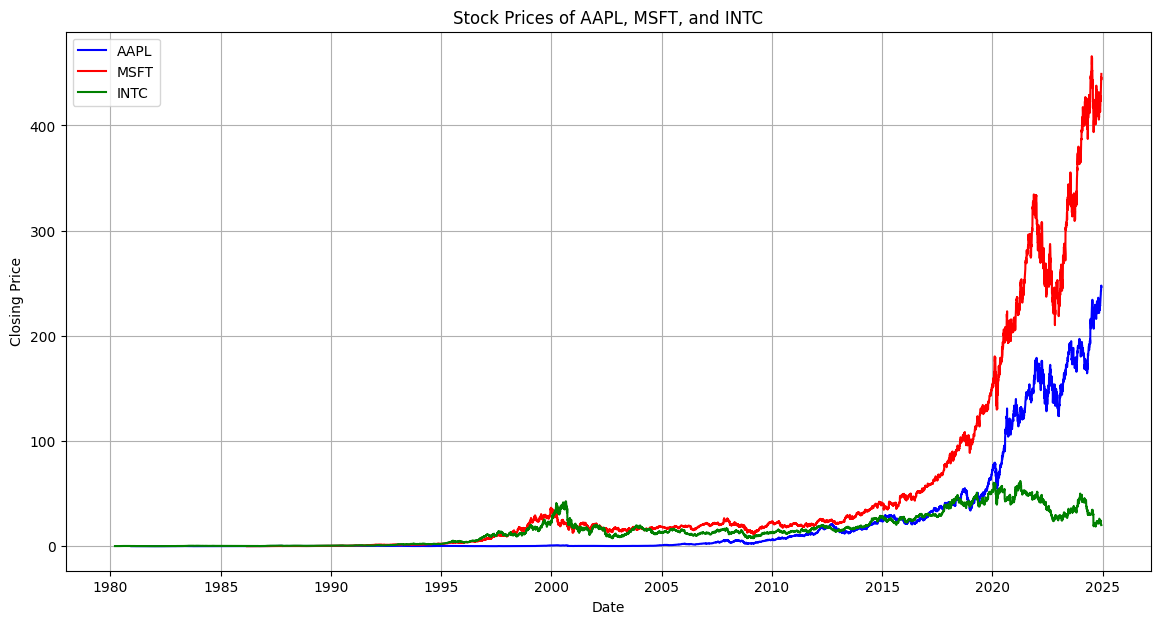

In [229]:
# prompt: Plot aapl, msft and intc stock on one plot with different colors

import matplotlib.pyplot as plt

# Assuming df_AAPL, df_MSFT, and df_INTC are already defined as in your provided code.

plt.figure(figsize=(14, 7))

plt.plot(df_AAPL.index, df_AAPL['Close'], label='AAPL', color='blue')
plt.plot(df_MSFT.index, df_MSFT['Close'], label='MSFT', color='red')
plt.plot(df_INTC.index, df_INTC['Close'], label='INTC', color='green')

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Prices of AAPL, MSFT, and INTC')
plt.legend()
plt.grid(True)
plt.show()

In [230]:
# prompt: define a start data of january 1 2020, define an end of december 30 2023. Use plotly to generate candle stick plots of the AAPL, MSFT and INTC stock.

import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
from datetime import datetime

# Define start and end dates
start_date = datetime(2020, 1, 1)
end_date = datetime(2023, 12, 30)

# Download data for AAPL, MSFT, and INTC
tickers = ["AAPL", "MSFT", "INTC"]
data = yf.download(tickers, start=start_date, end=end_date)

# Create subplots for each stock
fig = go.Figure()

for ticker in tickers:
  fig.add_trace(go.Candlestick(x=data.index,
                              open=data['Open'][ticker],
                              high=data['High'][ticker],
                              low=data['Low'][ticker],
                              close=data['Close'][ticker],
                              name=ticker))

fig.update_layout(title="Candlestick Chart of AAPL, MSFT and INTC",
                  xaxis_title="Date",
                  yaxis_title="Price")
fig.show()

[*********************100%***********************]  3 of 3 completed


In [231]:
# prompt: make a new dataframe df_AAPL_diff representing difference of daily closing price. make a new dataframe df_MSFT_diff representing difference of daily closing price. make a new dataframe df_INTC_diff representing difference of daily closing price

# Calculate the daily difference in closing prices
df_AAPL_diff = df_AAPL['Close'].diff()
df_MSFT_diff = df_MSFT['Close'].diff()
df_INTC_diff = df_INTC['Close'].diff()

# Convert the difference series to dataframes
df_AAPL_diff = df_AAPL_diff.to_frame(name='Close_Difference')
df_MSFT_diff = df_MSFT_diff.to_frame(name='Close_Difference')
df_INTC_diff = df_INTC_diff.to_frame(name='Close_Difference')


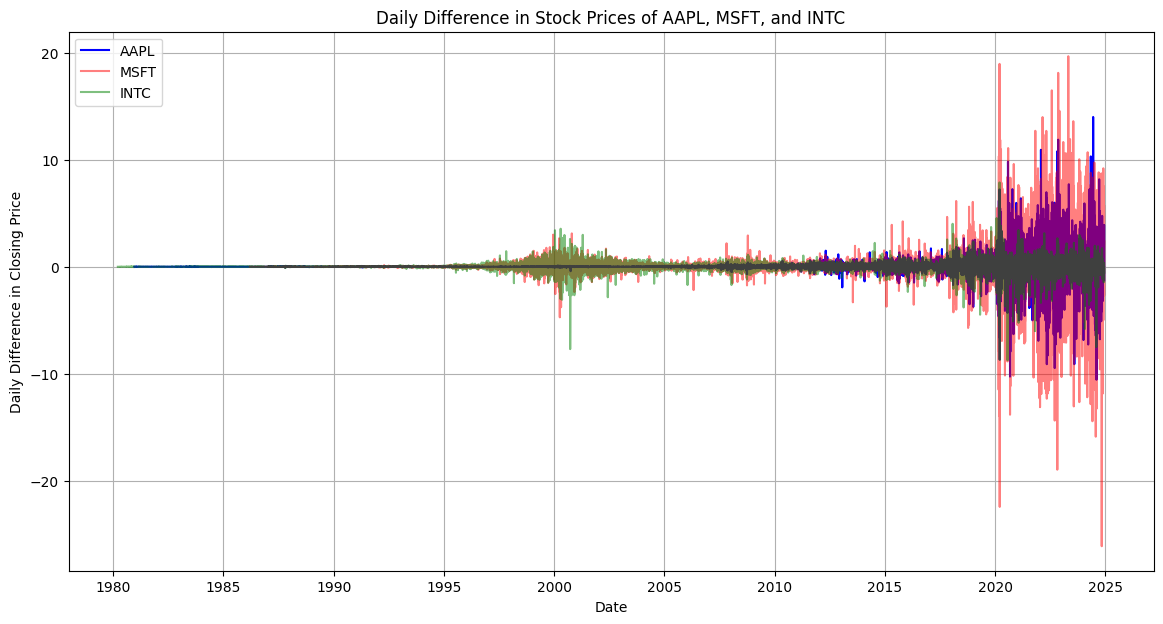

In [232]:
# prompt: plot df_AAPL_diff, df_MSFT_diff and df_INTC_diff with three colors

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

plt.plot(df_AAPL_diff.index, df_AAPL_diff['Close_Difference'], label='AAPL', color='blue')
plt.plot(df_MSFT_diff.index, df_MSFT_diff['Close_Difference'], label='MSFT', color='red', alpha=0.5)
plt.plot(df_INTC_diff.index, df_INTC_diff['Close_Difference'], label='INTC', color='green',alpha=0.5)

plt.xlabel('Date')
plt.ylabel('Daily Difference in Closing Price')
plt.title('Daily Difference in Stock Prices of AAPL, MSFT, and INTC')
plt.legend()
plt.grid(True)
plt.show()

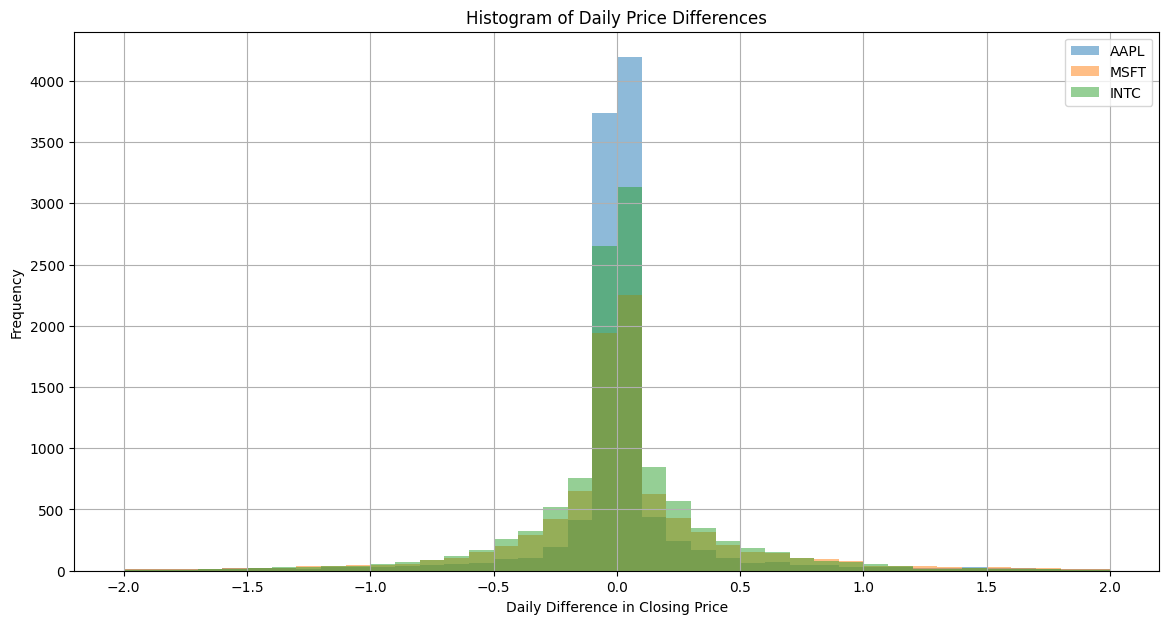

In [233]:
# prompt: plot the histogram of df_AAPL_diff, df_MSFT_diff and df_INTC_diff with 15 bins.  narrow range from -10 to 10.

import matplotlib.pyplot as plt

# Assuming df_AAPL_diff, df_MSFT_diff, and df_INTC_diff are already defined as in your provided code.

plt.figure(figsize=(14, 7))
bin=40
range_display=2

plt.hist(df_AAPL_diff['Close_Difference'], bin, range=(-1*range_display, range_display), alpha=0.5, label='AAPL')
plt.hist(df_MSFT_diff['Close_Difference'], bin, range=(-1*range_display, range_display), alpha=0.5, label='MSFT')
plt.hist(df_INTC_diff['Close_Difference'], bin, range=(-1*range_display, range_display), alpha=0.5, label='INTC')

plt.xlabel('Daily Difference in Closing Price')
plt.ylabel('Frequency')
plt.title('Histogram of Daily Price Differences')
plt.legend()
plt.grid(True)
plt.show()

In [234]:
# prompt: generate a new dataframe df_AAPL_1985 containing a section of df_AAPL_diff from 1985 ti 1995

# Assuming df_AAPL_diff is already defined as in your provided code.

# Convert the index to datetime objects if they aren't already
df_AAPL_diff.index = pd.to_datetime(df_AAPL_diff.index)

# Create the new dataframe with the specified date range
df_AAPL_1985 = df_AAPL_diff[(df_AAPL_diff.index >= '1985-01-01') & (df_AAPL_diff.index < '1995-01-01')]
df_AAPL_2000 = df_AAPL_diff[(df_AAPL_diff.index >= '2000-01-01') & (df_AAPL_diff.index < '2010-01-01')]

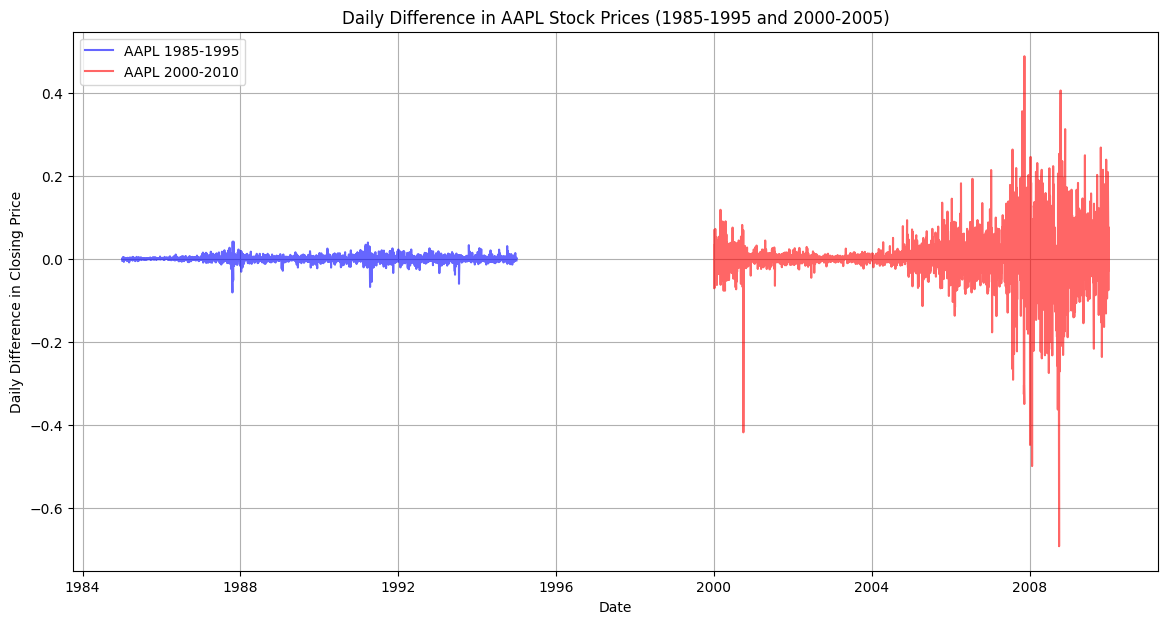

In [235]:
# prompt: plot df_AAPL_1985 and df_AAPL_2000 with two different colors and alpha of 0.6

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

plt.plot(df_AAPL_1985.index, df_AAPL_1985['Close_Difference'], label='AAPL 1985-1995', color='blue', alpha=0.6)
plt.plot(df_AAPL_2000.index, df_AAPL_2000['Close_Difference'], label='AAPL 2000-2010', color='red', alpha=0.6)

plt.xlabel('Date')
plt.ylabel('Daily Difference in Closing Price')
plt.title('Daily Difference in AAPL Stock Prices (1985-1995 and 2000-2005)')
plt.legend()
plt.grid(True)
plt.show()

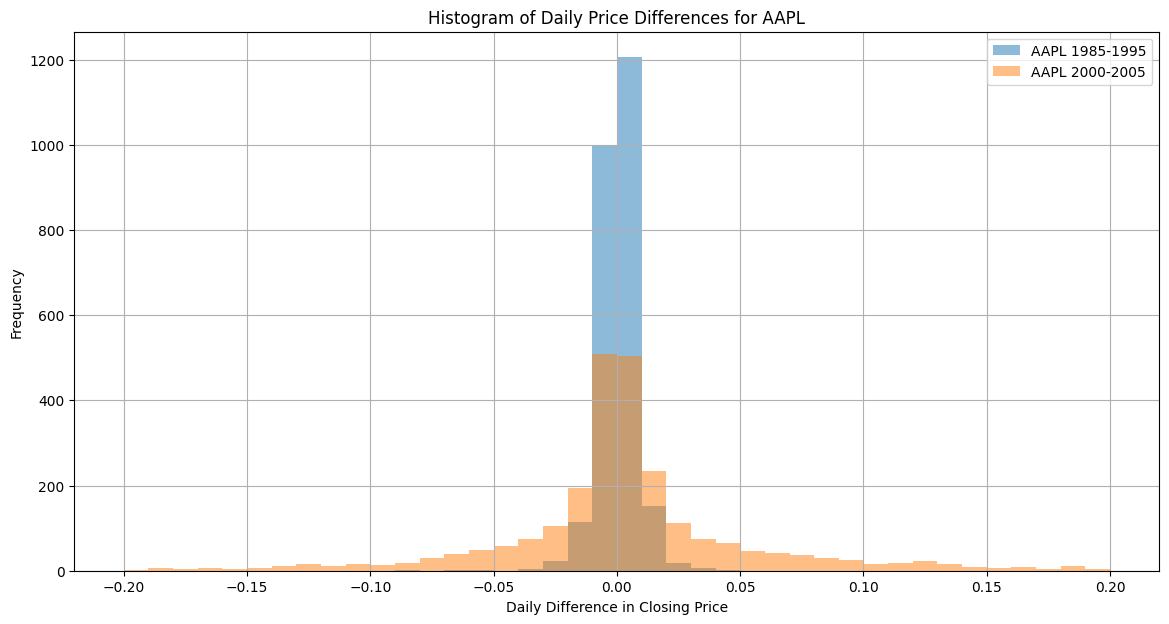

In [236]:
# prompt: plot histogram of df_AAPL_1985 and df_AAPL_2000

plt.figure(figsize=(14, 7))
plt.hist(df_AAPL_1985['Close_Difference'], bins=40, range=(-0.2, 0.2), alpha=0.5, label='AAPL 1985-1995')
plt.hist(df_AAPL_2000['Close_Difference'], bins=40, range=(-0.2, 0.2), alpha=0.5, label='AAPL 2000-2005')
plt.xlabel('Daily Difference in Closing Price')
plt.ylabel('Frequency')
plt.title('Histogram of Daily Price Differences for AAPL')
plt.legend()
plt.grid(True)
plt.show()
# it appears the histogram is different

data frame
df_AAPL : Apple stock
df_AAPL_diff: day to day difference of Apple stock
df_AAPL_1985: ten year snap shop of df_AAPL_diff from 1985 to 1995

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24354 entries, 1927-12-30 00:00:00-05:00 to 2024-12-11 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          24354 non-null  float64
 1   High          24354 non-null  float64
 2   Low           24354 non-null  float64
 3   Close         24354 non-null  float64
 4   Volume        24354 non-null  int64  
 5   Dividends     24354 non-null  float64
 6   Stock Splits  24354 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 1.5 MB


<Axes: title={'center': 'Random display'}, xlabel='Date'>

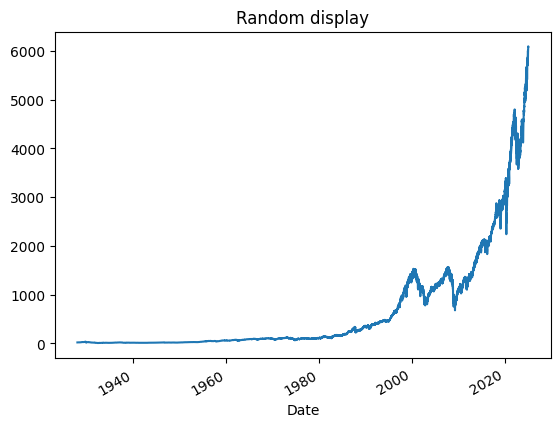

In [237]:
# Method 1 is to get history of ticker symbol
sp500=sp500.history(period="max")
sp500.info()
sp500['Close'].plot(title="Random display")

In [238]:
sp500_AAPL=yf.Ticker("AAPL")
sp500_AAPL=sp500_AAPL.history(period="max")

In [239]:
sp500_AAPL.head(10)

Open      High       Low     Close     Volume  \
Date                                                                           
1980-12-12 00:00:00-05:00  0.098834  0.099264  0.098834  0.098834  469033600   
1980-12-15 00:00:00-05:00  0.094108  0.094108  0.093678  0.093678  175884800   
1980-12-16 00:00:00-05:00  0.087232  0.087232  0.086802  0.086802  105728000   
1980-12-17 00:00:00-05:00  0.088951  0.089381  0.088951  0.088951   86441600   
1980-12-18 00:00:00-05:00  0.091530  0.091959  0.091530  0.091530   73449600   
1980-12-19 00:00:00-05:00  0.097116  0.097545  0.097116  0.097116   48630400   
1980-12-22 00:00:00-05:00  0.101842  0.102273  0.101842  0.101842   37363200   
1980-12-23 00:00:00-05:00  0.106140  0.106570  0.106140  0.106140   46950400   
1980-12-24 00:00:00-05:00  0.111726  0.112156  0.111726  0.111726   48003200   
1980-12-26 00:00:00-05:00  0.122039  0.122469  0.122039  0.122039   55574400   

                           Dividends  Stock Splits  
Date                                                
1980-12-12 00:00:00-05:00        0.0           0.0  
1980-12-15 00:00:00-05:00        0.0           0.0  
1980-12-16 00:00:00-05:00        0.0           0.0  
1980-12-17 00:00:00-05:00        0.0           0.0  
1980-12-18 00:00:00-05:00        0.0           0.0  
1980-12-19 00:00:00-05:00        0.0           0.0  
1980-12-22 00:00:00-05:00        0.0           0.0  
1980-12-23 00:00:00-05:00        0.0           0.0  
1980-12-24 00:00:00-05:00        0.0           0.0  
1980-12-26 00:00:00-05:00        0.0           0.0

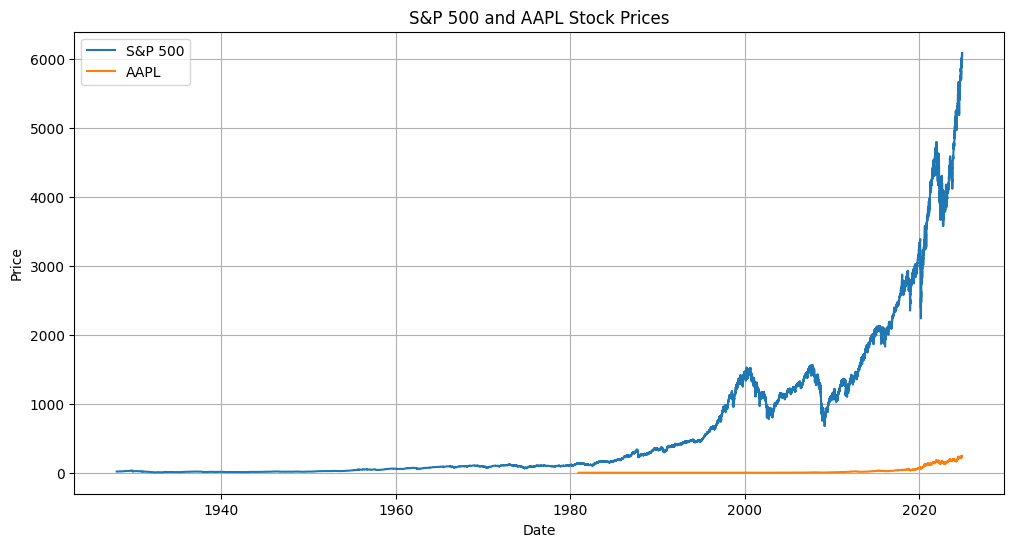

In [240]:
# prompt: plot both SP500 and sp500_AAPL

sp500_name = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500 = yf.Ticker("^GSPC")
sp500=sp500.history(period="max")

sp500_AAPL=yf.Ticker("AAPL")
sp500_AAPL=sp500_AAPL.history(period="max")

plt.figure(figsize=(12, 6))
plt.plot(sp500.index, sp500['Close'], label='S&P 500')
plt.plot(sp500_AAPL.index, sp500_AAPL['Close'], label='AAPL')
plt.title('S&P 500 and AAPL Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [241]:
sp500_AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11092 entries, 1980-12-12 00:00:00-05:00 to 2024-12-11 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          11092 non-null  float64
 1   High          11092 non-null  float64
 2   Low           11092 non-null  float64
 3   Close         11092 non-null  float64
 4   Volume        11092 non-null  int64  
 5   Dividends     11092 non-null  float64
 6   Stock Splits  11092 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 693.2 KB


In [242]:
sp500_AAPL.head(10)

Open      High       Low     Close     Volume  \
Date                                                                           
1980-12-12 00:00:00-05:00  0.098834  0.099264  0.098834  0.098834  469033600   
1980-12-15 00:00:00-05:00  0.094108  0.094108  0.093678  0.093678  175884800   
1980-12-16 00:00:00-05:00  0.087232  0.087232  0.086802  0.086802  105728000   
1980-12-17 00:00:00-05:00  0.088951  0.089381  0.088951  0.088951   86441600   
1980-12-18 00:00:00-05:00  0.091530  0.091959  0.091530  0.091530   73449600   
1980-12-19 00:00:00-05:00  0.097116  0.097545  0.097116  0.097116   48630400   
1980-12-22 00:00:00-05:00  0.101842  0.102273  0.101842  0.101842   37363200   
1980-12-23 00:00:00-05:00  0.106140  0.106570  0.106140  0.106140   46950400   
1980-12-24 00:00:00-05:00  0.111726  0.112156  0.111726  0.111726   48003200   
1980-12-26 00:00:00-05:00  0.122039  0.122469  0.122039  0.122039   55574400   

                           Dividends  Stock Splits  
Date                                                
1980-12-12 00:00:00-05:00        0.0           0.0  
1980-12-15 00:00:00-05:00        0.0           0.0  
1980-12-16 00:00:00-05:00        0.0           0.0  
1980-12-17 00:00:00-05:00        0.0           0.0  
1980-12-18 00:00:00-05:00        0.0           0.0  
1980-12-19 00:00:00-05:00        0.0           0.0  
1980-12-22 00:00:00-05:00        0.0           0.0  
1980-12-23 00:00:00-05:00        0.0           0.0  
1980-12-24 00:00:00-05:00        0.0           0.0  
1980-12-26 00:00:00-05:00        0.0           0.0

<Axes: xlabel='Date'>

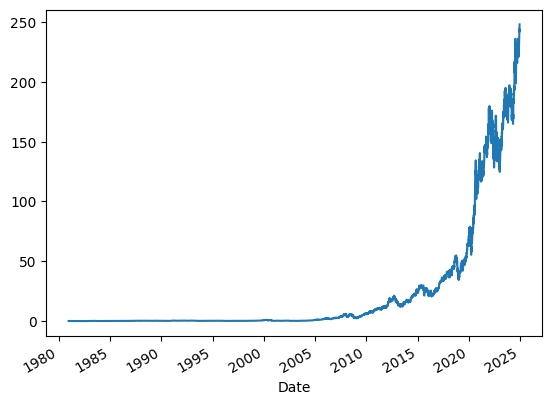

In [243]:
sp500_AAPL['Open'].plot()

In [244]:
#Method 2 is to download yt instead of using history - does not work
aapl_df = yf.download('AAPL',
                      start='2019-01-01',
                      end='2023-02-03',
                      progress=False,
)
aapl_df.tail(5)

Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2023-01-27  144.411377  145.929993  147.229996  143.080002  143.160004   
2023-01-30  141.511887  143.000000  145.550003  142.850006  144.960007   
2023-01-31  142.788437  144.289993  144.339996  142.279999  142.699997   
2023-02-01  143.916595  145.429993  146.610001  141.320007  143.970001   
2023-02-02  149.250488  150.820007  151.179993  148.169998  148.899994   

Price          Volume  
Ticker           AAPL  
Date                   
2023-01-27   70555800  
2023-01-30   64015300  
2023-01-31   65874500  
2023-02-01   77663600  
2023-02-02  118339000

In [245]:
# prompt: use plotly to generate candle stick of sp500_aapl

fig = go.Figure(data=[go.Candlestick(x=sp500_AAPL.index,
                open=sp500_AAPL['Open'],
                high=sp500_AAPL['High'],
                low=sp500_AAPL['Low'],
                close=sp500_AAPL['Close'])])

fig.update_layout(title='AAPL Candlestick Chart',
                  yaxis_title='Price')

fig.show()

In [246]:
# another line of synthax
#company = 'AAPL'

#start = dt.datetime(2012,1,1)
#end = dt.datetime.now()

# Use yfinance to download the data
#data2 = yf.download(company, start=start, end=end)

In [247]:
aapl_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1030 entries, 2019-01-02 to 2023-02-02
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  1030 non-null   float64
 1   (Close, AAPL)      1030 non-null   float64
 2   (High, AAPL)       1030 non-null   float64
 3   (Low, AAPL)        1030 non-null   float64
 4   (Open, AAPL)       1030 non-null   float64
 5   (Volume, AAPL)     1030 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 56.3 KB


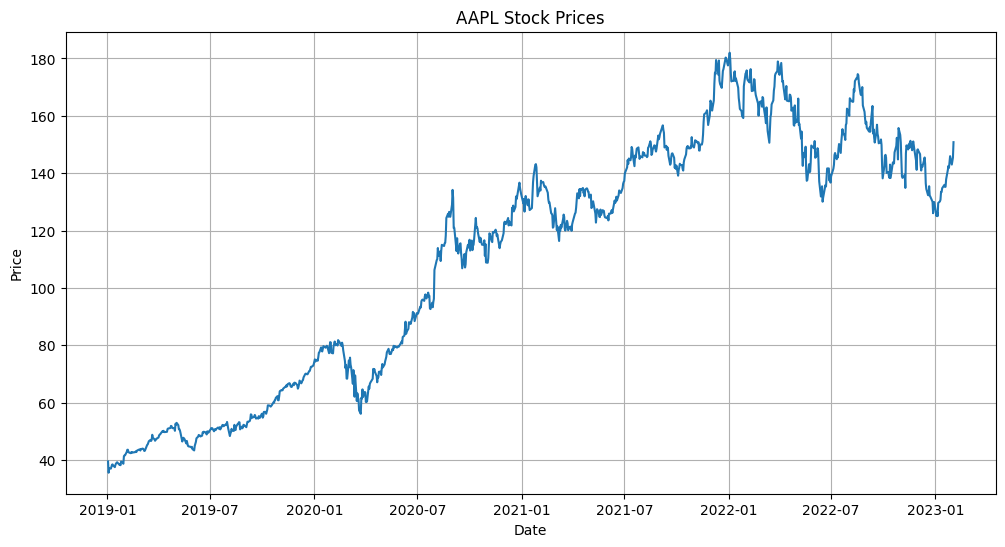

In [248]:
# prompt: plot the "Close" data of aapl_df

plt.figure(figsize=(12, 6))
plt.plot(aapl_df.index, aapl_df['Close'])
plt.title('AAPL Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

**Following reading lines do not work**

In [249]:

# prompt: plot the "close" of aapl_df in candle stick style
# seems only .history df can work. column names are different from .download type
# this does not work yet as "ValueError: Data for column "Open" must be ALL float or int."
import matplotlib.pyplot as plt
import mplfinance as mpf

# Assuming aapl_df is already defined

#mpf.plot(aapl_df, type='candle', style='charles', volume=True, title='AAPL Candlestick Chart')

In [250]:
import pandas_datareader as web
import datetime as dt
# does not work 'NoneType' object has no attribute 'group'
#company = 'AAPL'
#start = dt.datetime(2012,1,1)
#end = dt.datetime.now()
#data2 = web.DataReader(company,'yahoo',start,end)

## **Ticker gives a lot of information about a stock**

In [251]:
spy = yf.Ticker('SPY')
data = spy.funds_data
print(data)
data.description

'The Trust seeks to achieve its investment objective by holding a portfolio of the common stocks that are included in the index (the “Portfolio”), with the weight of each stock in the Portfolio substantially corresponding to the weight of such stock in the index.'

In [252]:
data.fund_operations

SPY  Category Average
Attributes                                                  
Annual Report Expense Ratio       0.000945          0.007655
Annual Holdings Turnover          0.030000          0.467500
Total Net Assets             344616.440000     344616.440000

In [253]:
yf.Ticker('AAPL').info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '(408) 996-1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryKey': 'consumer-electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and p

In [254]:
yf.Ticker('AAPL').recommendations

period  strongBuy  buy  hold  sell  strongSell
0     0m          8   24    12     1           2
1    -1m          8   24    12     1           2
2    -2m          8   23    12     1           2
3    -3m          8   24    12     0           2

In [255]:
yf.Ticker('AAPL').splits

Date
1987-06-16 00:00:00-04:00    2.0
2000-06-21 00:00:00-04:00    2.0
2005-02-28 00:00:00-05:00    2.0
2014-06-09 00:00:00-04:00    7.0
2020-08-31 00:00:00-04:00    4.0
Name: Stock Splits, dtype: float64

# **Part 2: Linkedin example of decision tree classifier to predict daily up and down**
https://www.linkedin.com/learning-login/share?forceAccount=false&redirect=https%3A%2F%2Fwww.linkedin.com%2Flearning%2Fpractical-python-for-algorithmic-trading%3Ftrk%3Dshare_ent_url%26shareId%3Dkj9sRzSVThuQ%252BuIMcj4kFg%253D%253D
<div style="position:relative;height:0;padding-bottom:56.25%"><iframe width="640" height="360" src="https://www.linkedin.com/learning/embed/practical-python-for-algorithmic-trading/algorithmic-trading-using-machine-learning?autoplay=false&claim=AQHu56llxA_5HgAAAZNW4n5TUgmQahpq_uQdw3n9z-tllGcjTkFiOiCHvAwmRZlHdgTohYw7BdF-6Tm_IiKYCreCrY1MeWlwtTv9qTqDtsJ_GrrraOJ8K0V43g0A5rN7Exrz_gX3kWPMv9N30fFgxZ83ktv3g5TnUUOVUncsNepY9OzDVUFzLljljk6K2wJNonx_uPJbVCziETZkLs4JVd3Pjfs1qBN34O1EtZ6sc3YDhlFEIF3Jj8JoQEvpeLUqaemYFtQIgQzLjIIMQ9ZVdBEJnqlHsOvlMkdC0PDvdPwcDIv18f6RmW7rHnflZNzOQcri9U_jcmEpzHE73Z2SVlBh6YvBJxu8__GDrynKKQEy5E-JXdHvzkGmXSIrtvNs2Ruvhsw2NKCWp8ab4jVEcoUOErfe4ajWiubZNbc8rfLcF8LhT-5JqVbl3u5Rnh8GnsO-ULKPJTt-tAf89hMAoM8HnkWOzGv9oxts3wrX4JB7rNz2Rc3eo5jcvpqhcxfSziivTfc5xroqEAV54AF1_b6uvq0UEQ92iaqle8bVMZF_YHB9dCmQvjyMDO2295qXQHiON8DmGP_Dm_7OyZkrGi-rjzHZqVC0W_8e-ibeB_vgilp_LWcRfqfX9amrY2d19WfmqZ6lDtB90eledyB66QEH2wcfc_d7ne90dO7OqILPArU_DCYXiLFZ4nS4ISuOxTGanK8FgKWuNmqrm6fhE6w-W3NOtn1WIkz1mrSXH3dPisAJqoOMA-QnCIuT00uQeL9nP_pyTEf8Qm4Tz_OcfJu1-jOlcYtudh-g6HXQDU3iIJaxqzMYCPksW2hF8cTLguoQxfS2qXWXFSaoTyXHStKFoWYV_aBRBkIt3iMp3FWC0xBEIA5vmb-rosRo22ZERcB_XLfK0y4ip39XStr4VoGxEXMXVRPb13kA-EYecQfcxjTPkAXDGAdHK6x-_dxclAFir1Sed25TLSQwDJlj7DJ_y5EFNERw4z_Be1ICMkfza2Zt-evvgjdMtmMvl1W_71_vx9yXnd6ObdnE7aKdq4KdxZryEPj6bfe3mb6oUZm6KNbVFv0MQ0uu_cVKAayABaSCQtC95_38P9KjohikZutB39MyaxuMP2f6kGM7TP4j4sATYM4Pvpg-oCyCQREzt4z5QmVAw6Hj50gtguCiCZeoIwNoSEPIxIPw-oR2plzuVFX1HcS72hKVh3L-r71V" mozallowfullscreen="true" webkitallowfullscreen="true" allowfullscreen="true" frameborder="0" style="position:absolute;width:100%;height:100%;left:0"></iframe></div><p><strong><a href="https://www.linkedin.com/learning/practical-python-for-algorithmic-trading/algorithmic-trading-using-machine-learning?trk=embed_lil">Algorithmic trading using machine learning</a></strong> from <strong><a href="https://www.linkedin.com/learning/practical-python-for-algorithmic-trading?trk=embed_lil">Practical Python for Algorithmic Trading</a></strong> by <strong><a href="https://www.linkedin.com/learning/instructors/jesus-lopez?trk=embed_lil">Jesus Lopez</a></strong></p>

In [256]:
#yf.download(tickers='AAPL', period='1mo', interval='5m')
#MSFT, BTC-USD
#ticker='AAPL'
#df_AAPL=yf.download(tickers='AAPL')
#df_AAPL.head(10)
df_AAPL = yf.Ticker("AAPL").history(period="max")

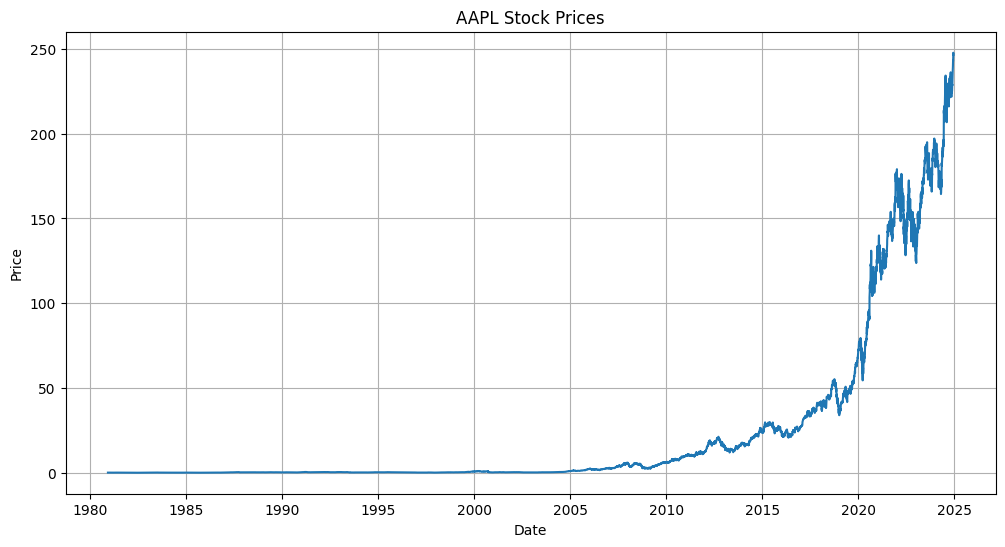

In [257]:
# prompt: plot df_aapl close price

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_AAPL.index, df_AAPL['Close'])
plt.title('AAPL Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [258]:
# prompt: Using dataframe df_AAPL: history with candle stick style
# so far can not generate candle stick plot yet


In [259]:
# prompt: turn date column to date type

# Assuming aapl_df is your DataFrame
#aapl_df.index = pd.to_datetime(aapl_df.index)
#print(aapl_df.info())

In [260]:
# prompt: use plotly to generate candle stick of df_AAPL from 2020 to 2022

import yfinance as yf
import pandas as pd
import plotly.graph_objects as go

# Assuming df_AAPL is already defined as in your provided code
df_AAPL = yf.Ticker("AAPL").history(period="max")

# Filter data for the period 2020-2022
df_AAPL_2020_2022 = df_AAPL[(df_AAPL.index >= '2020-01-01') & (df_AAPL.index <= '2022-12-31')]

# Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(x=df_AAPL_2020_2022.index,
                open=df_AAPL_2020_2022['Open'],
                high=df_AAPL_2020_2022['High'],
                low=df_AAPL_2020_2022['Low'],
                close=df_AAPL_2020_2022['Close'])])

fig.update_layout(title='AAPL Candlestick Chart (2020-2022)',
                  yaxis_title='Price')

fig.show()
#df_AAPL_2020_2022.to_csv('AAPL_2020_2022.csv')

In [261]:
# prompt: use plotly to generate candle stick of df_AAPL from january 2021 to march 2021

# Assuming df_AAPL is already defined as in your provided code
df_AAPL = yf.Ticker("AAPL").history(period="max")

# Filter data for January 2021 to March 2021
df_AAPL_filtered = df_AAPL[(df_AAPL.index >= '2021-01-01') & (df_AAPL.index <= '2021-03-31')]

# Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(x=df_AAPL_filtered.index,
                open=df_AAPL_filtered['Open'],
                high=df_AAPL_filtered['High'],
                low=df_AAPL_filtered['Low'],
                close=df_AAPL_filtered['Close'])])

fig.update_layout(title='AAPL Candlestick Chart (Jan 2021 - Mar 2021)',
                  yaxis_title='Price')

fig.show()
#df_AAPL_filtered.to_csv('AAPL_2021_JanMar.csv')

In [262]:
df_AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11092 entries, 1980-12-12 00:00:00-05:00 to 2024-12-11 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          11092 non-null  float64
 1   High          11092 non-null  float64
 2   Low           11092 non-null  float64
 3   Close         11092 non-null  float64
 4   Volume        11092 non-null  int64  
 5   Dividends     11092 non-null  float64
 6   Stock Splits  11092 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 693.2 KB


In [263]:
df_AAPL.describe()

Open          High           Low         Close        Volume  \
count  11092.000000  11092.000000  11092.000000  11092.000000  1.109200e+04   
mean      23.196243     23.443802     22.961424     23.214032  3.157964e+08   
std       49.041773     49.557177     48.566684     49.089966  3.349531e+08   
min        0.038245      0.038245      0.037815      0.037815  0.000000e+00   
25%        0.242879      0.248067      0.237873      0.242896  1.114756e+08   
50%        0.442485      0.451345      0.435876      0.444364  2.038680e+08   
75%       18.072919     18.255875     17.884801     18.072773  3.965444e+08   
max      247.960007    250.800003    246.259995    247.770004  7.421641e+09   

          Dividends  Stock Splits  
count  11092.000000  11092.000000  
mean       0.000791      0.001533  
std        0.012173      0.083308  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        0.250000      7.000000

### **As of November 2024, use only Ticker.history and use plotly function**
Alternatively can use download, and mpf.plot which is slower

In [264]:
df_AAPL.head(10)

Open      High       Low     Close     Volume  \
Date                                                                           
1980-12-12 00:00:00-05:00  0.098834  0.099264  0.098834  0.098834  469033600   
1980-12-15 00:00:00-05:00  0.094108  0.094108  0.093678  0.093678  175884800   
1980-12-16 00:00:00-05:00  0.087232  0.087232  0.086802  0.086802  105728000   
1980-12-17 00:00:00-05:00  0.088951  0.089381  0.088951  0.088951   86441600   
1980-12-18 00:00:00-05:00  0.091530  0.091959  0.091530  0.091530   73449600   
1980-12-19 00:00:00-05:00  0.097116  0.097545  0.097116  0.097116   48630400   
1980-12-22 00:00:00-05:00  0.101842  0.102273  0.101842  0.101842   37363200   
1980-12-23 00:00:00-05:00  0.106140  0.106570  0.106140  0.106140   46950400   
1980-12-24 00:00:00-05:00  0.111726  0.112156  0.111726  0.111726   48003200   
1980-12-26 00:00:00-05:00  0.122039  0.122469  0.122039  0.122039   55574400   

                           Dividends  Stock Splits  
Date                                                
1980-12-12 00:00:00-05:00        0.0           0.0  
1980-12-15 00:00:00-05:00        0.0           0.0  
1980-12-16 00:00:00-05:00        0.0           0.0  
1980-12-17 00:00:00-05:00        0.0           0.0  
1980-12-18 00:00:00-05:00        0.0           0.0  
1980-12-19 00:00:00-05:00        0.0           0.0  
1980-12-22 00:00:00-05:00        0.0           0.0  
1980-12-23 00:00:00-05:00        0.0           0.0  
1980-12-24 00:00:00-05:00        0.0           0.0  
1980-12-26 00:00:00-05:00        0.0           0.0

In [265]:
# prompt: generate candle stick style plot for df_AAPL

# Assuming df_AAPL is already defined as in your provided code

# Create candlestick chart
fig = go.Figure(data=[go.Candlestick(x=df_AAPL.index,
                open=df_AAPL['Open'],
                high=df_AAPL['High'],
                low=df_AAPL['Low'],
                close=df_AAPL['Close'])])

fig.update_layout(title='AAPL Candlestick Chart',
                  yaxis_title='Price')

fig.show()

In [266]:
#This run before but not here.
#import matplotlib.pyplot as plt
#import mplfinance as mpf

# Assuming aapl_df is already defined
# mpf.plot(df_AAPL, type='candle', style='charles', volume=True, title='AAPL Candlestick Chart')
# this works but bit slower

In [267]:
#export to excel file
#df_AAPL.to_csv('AAPL.csv')

## **Filter data**

In [268]:
df_AAPL_2016 = df_AAPL[df_AAPL.index.year >= 2016]
df_AAPL_2016
#df_AAPL_2016.to_csv('AAPL_2016.csv')

Open        High         Low       Close  \
Date                                                                        
2016-01-04 00:00:00-05:00   23.240000   23.865109   23.101842   23.860579   
2016-01-05 00:00:00-05:00   23.951173   23.973822   23.194702   23.262648   
2016-01-06 00:00:00-05:00   22.775701   23.185647   22.619425   22.807409   
2016-01-07 00:00:00-05:00   22.349902   22.678310   21.840302   21.844831   
2016-01-08 00:00:00-05:00   22.320458   22.447291   21.915043   21.960340   
...                               ...         ...         ...         ...   
2024-12-05 00:00:00-05:00  243.990005  244.539993  242.130005  243.039993   
2024-12-06 00:00:00-05:00  242.910004  244.630005  242.080002  242.839996   
2024-12-09 00:00:00-05:00  241.830002  247.240005  241.750000  246.750000   
2024-12-10 00:00:00-05:00  246.889999  248.210007  245.339996  247.770004   
2024-12-11 00:00:00-05:00  247.960007  250.800003  246.259995  246.490005   

                              Volume  Dividends  Stock Splits  
Date                                                           
2016-01-04 00:00:00-05:00  270597600        0.0           0.0  
2016-01-05 00:00:00-05:00  223164000        0.0           0.0  
2016-01-06 00:00:00-05:00  273829600        0.0           0.0  
2016-01-07 00:00:00-05:00  324377600        0.0           0.0  
2016-01-08 00:00:00-05:00  283192000        0.0           0.0  
...                              ...        ...           ...  
2024-12-05 00:00:00-05:00   40033900        0.0           0.0  
2024-12-06 00:00:00-05:00   36870600        0.0           0.0  
2024-12-09 00:00:00-05:00   44649200        0.0           0.0  
2024-12-10 00:00:00-05:00   36914800        0.0           0.0  
2024-12-11 00:00:00-05:00   45147600        0.0           0.0  

[2251 rows x 7 columns]

In [269]:
df_AAPL_2016.Close.pct_change()*100

Date
2016-01-04 00:00:00-05:00         NaN
2016-01-05 00:00:00-05:00   -2.505936
2016-01-06 00:00:00-05:00   -1.956950
2016-01-07 00:00:00-05:00   -4.220461
2016-01-08 00:00:00-05:00    0.528771
                               ...   
2024-12-05 00:00:00-05:00    0.012345
2024-12-06 00:00:00-05:00   -0.082290
2024-12-09 00:00:00-05:00    1.610115
2024-12-10 00:00:00-05:00    0.413376
2024-12-11 00:00:00-05:00   -0.516608
Name: Close, Length: 2251, dtype: float64

In [270]:
df_AAPL_2016['change_tomorrow']=df_AAPL_2016.Close.pct_change()*100
df_AAPL_2016=df_AAPL_2016.dropna().copy()
# needs to copy the data frame permanently

<ipython-input-270-a11079954322>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [271]:
df_AAPL_2016['change_tomorrow_direction']=np.where(df_AAPL_2016['change_tomorrow']>=0,"UP","DOWN")
df_AAPL_2016

Open        High         Low       Close  \
Date                                                                        
2016-01-05 00:00:00-05:00   23.951173   23.973822   23.194702   23.262648   
2016-01-06 00:00:00-05:00   22.775701   23.185647   22.619425   22.807409   
2016-01-07 00:00:00-05:00   22.349902   22.678310   21.840302   21.844831   
2016-01-08 00:00:00-05:00   22.320458   22.447291   21.915043   21.960340   
2016-01-11 00:00:00-05:00   22.415583   22.435966   22.046405   22.315928   
...                               ...         ...         ...         ...   
2024-12-05 00:00:00-05:00  243.990005  244.539993  242.130005  243.039993   
2024-12-06 00:00:00-05:00  242.910004  244.630005  242.080002  242.839996   
2024-12-09 00:00:00-05:00  241.830002  247.240005  241.750000  246.750000   
2024-12-10 00:00:00-05:00  246.889999  248.210007  245.339996  247.770004   
2024-12-11 00:00:00-05:00  247.960007  250.800003  246.259995  246.490005   

                              Volume  Dividends  Stock Splits  \
Date                                                            
2016-01-05 00:00:00-05:00  223164000        0.0           0.0   
2016-01-06 00:00:00-05:00  273829600        0.0           0.0   
2016-01-07 00:00:00-05:00  324377600        0.0           0.0   
2016-01-08 00:00:00-05:00  283192000        0.0           0.0   
2016-01-11 00:00:00-05:00  198957600        0.0           0.0   
...                              ...        ...           ...   
2024-12-05 00:00:00-05:00   40033900        0.0           0.0   
2024-12-06 00:00:00-05:00   36870600        0.0           0.0   
2024-12-09 00:00:00-05:00   44649200        0.0           0.0   
2024-12-10 00:00:00-05:00   36914800        0.0           0.0   
2024-12-11 00:00:00-05:00   45147600        0.0           0.0   

                           change_tomorrow change_tomorrow_direction  
Date                                                                  
2016-01-05 00:00:00-05:00        -2.505936                      DOWN  
2016-01-06 00:00:00-05:00        -1.956950                      DOWN  
2016-01-07 00:00:00-05:00        -4.220461                      DOWN  
2016-01-08 00:00:00-05:00         0.528771                        UP  
2016-01-11 00:00:00-05:00         1.619224                        UP  
...                                    ...                       ...  
2024-12-05 00:00:00-05:00         0.012345                        UP  
2024-12-06 00:00:00-05:00        -0.082290                      DOWN  
2024-12-09 00:00:00-05:00         1.610115                        UP  
2024-12-10 00:00:00-05:00         0.413376                        UP  
2024-12-11 00:00:00-05:00        -0.516608                      DOWN  

[2250 rows x 9 columns]

**How to predict daily up and down with daily stock price move?**

In [272]:
target = df_AAPL_2016['change_tomorrow_direction']
target

Date
2016-01-05 00:00:00-05:00    DOWN
2016-01-06 00:00:00-05:00    DOWN
2016-01-07 00:00:00-05:00    DOWN
2016-01-08 00:00:00-05:00      UP
2016-01-11 00:00:00-05:00      UP
                             ... 
2024-12-05 00:00:00-05:00      UP
2024-12-06 00:00:00-05:00    DOWN
2024-12-09 00:00:00-05:00      UP
2024-12-10 00:00:00-05:00      UP
2024-12-11 00:00:00-05:00    DOWN
Name: change_tomorrow_direction, Length: 2250, dtype: object

In [273]:
explanatory = df_AAPL_2016.drop(columns=['change_tomorrow','change_tomorrow_direction','Dividends','Stock Splits'])
explanatory

Open        High         Low       Close  \
Date                                                                        
2016-01-05 00:00:00-05:00   23.951173   23.973822   23.194702   23.262648   
2016-01-06 00:00:00-05:00   22.775701   23.185647   22.619425   22.807409   
2016-01-07 00:00:00-05:00   22.349902   22.678310   21.840302   21.844831   
2016-01-08 00:00:00-05:00   22.320458   22.447291   21.915043   21.960340   
2016-01-11 00:00:00-05:00   22.415583   22.435966   22.046405   22.315928   
...                               ...         ...         ...         ...   
2024-12-05 00:00:00-05:00  243.990005  244.539993  242.130005  243.039993   
2024-12-06 00:00:00-05:00  242.910004  244.630005  242.080002  242.839996   
2024-12-09 00:00:00-05:00  241.830002  247.240005  241.750000  246.750000   
2024-12-10 00:00:00-05:00  246.889999  248.210007  245.339996  247.770004   
2024-12-11 00:00:00-05:00  247.960007  250.800003  246.259995  246.490005   

                              Volume  
Date                                  
2016-01-05 00:00:00-05:00  223164000  
2016-01-06 00:00:00-05:00  273829600  
2016-01-07 00:00:00-05:00  324377600  
2016-01-08 00:00:00-05:00  283192000  
2016-01-11 00:00:00-05:00  198957600  
...                              ...  
2024-12-05 00:00:00-05:00   40033900  
2024-12-06 00:00:00-05:00   36870600  
2024-12-09 00:00:00-05:00   44649200  
2024-12-10 00:00:00-05:00   36914800  
2024-12-11 00:00:00-05:00   45147600  

[2250 rows x 5 columns]

In [274]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [275]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X=explanatory,y=target)

DecisionTreeClassifier()

**Visualize decision tree classifier results of daily up and down**

[Text(0.7085158178083636, 0.9918032786885246, 'Volume <= 186118800.0\ngini = 0.497\nsamples = 2250\nvalue = [1036, 1214]'),
 Text(0.4967847806440236, 0.9754098360655737, 'Close <= 226.251\ngini = 0.494\nsamples = 2061\nvalue = [919, 1142]'),
 Text(0.6026502992261936, 0.9836065573770492, 'True  '),
 Text(0.4332572652697705, 0.9590163934426229, 'Open <= 224.616\ngini = 0.495\nsamples = 2004\nvalue = [904, 1100]'),
 Text(0.4294594964589468, 0.9426229508196722, 'Close <= 222.935\ngini = 0.494\nsamples = 1990\nvalue = [890, 1100]'),
 Text(0.42566172764812316, 0.9262295081967213, 'Open <= 222.31\ngini = 0.495\nsamples = 1981\nvalue = [890, 1091]'),
 Text(0.42186395883729955, 0.9098360655737705, 'Open <= 115.605\ngini = 0.495\nsamples = 1975\nvalue = [884, 1091]'),
 Text(0.3825616191408568, 0.8934426229508197, 'Close <= 112.304\ngini = 0.488\nsamples = 1036\nvalue = [437, 599]'),
 Text(0.36499268997884154, 0.8770491803278688, 'Open <= 111.62\ngini = 0.49\nsamples = 1011\nvalue = [434, 577]'),

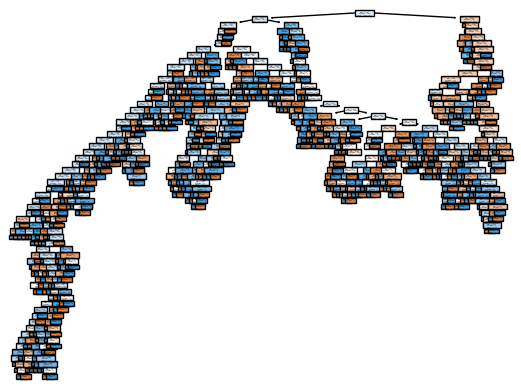

In [276]:
from sklearn.tree import plot_tree
plot_tree(model_dt, feature_names=explanatory.columns, filled=True)

shorten the tree

[Text(0.4838709677419355, 0.9375, 'Volume <= 186118800.0\ngini = 0.497\nsamples = 2250\nvalue = [1036, 1214]'),
 Text(0.3064516129032258, 0.8125, 'Close <= 226.251\ngini = 0.494\nsamples = 2061\nvalue = [919, 1142]'),
 Text(0.3951612903225806, 0.875, 'True  '),
 Text(0.22580645161290322, 0.6875, 'Open <= 224.616\ngini = 0.495\nsamples = 2004\nvalue = [904, 1100]'),
 Text(0.1935483870967742, 0.5625, 'Close <= 222.935\ngini = 0.494\nsamples = 1990\nvalue = [890, 1100]'),
 Text(0.16129032258064516, 0.4375, 'Open <= 222.31\ngini = 0.495\nsamples = 1981\nvalue = [890, 1091]'),
 Text(0.12903225806451613, 0.3125, 'Open <= 115.605\ngini = 0.495\nsamples = 1975\nvalue = [884, 1091]'),
 Text(0.06451612903225806, 0.1875, 'Close <= 112.304\ngini = 0.488\nsamples = 1036\nvalue = [437, 599]'),
 Text(0.03225806451612903, 0.0625, 'gini = 0.49\nsamples = 1011\nvalue = [434, 577]'),
 Text(0.0967741935483871, 0.0625, 'gini = 0.211\nsamples = 25\nvalue = [3, 22]'),
 Text(0.1935483870967742, 0.1875, 'Close

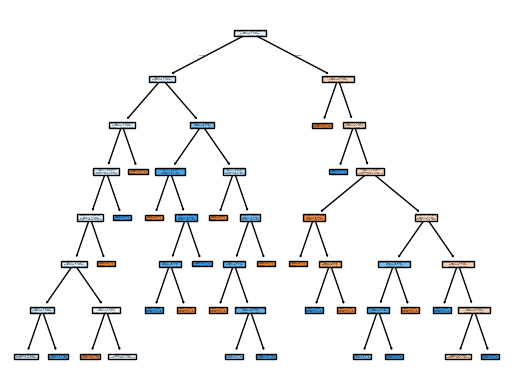

In [277]:
model_dt = DecisionTreeClassifier(max_depth=7)
model_dt.fit(X=explanatory,y=target)
plot_tree(model_dt, feature_names=explanatory.columns, filled=True)

In [278]:
# calculate the prediction
model_dt.predict(explanatory)
df_AAPL_2016['prediction']=model_dt.predict(explanatory)
df_AAPL_2016

Open        High         Low       Close  \
Date                                                                        
2016-01-05 00:00:00-05:00   23.951173   23.973822   23.194702   23.262648   
2016-01-06 00:00:00-05:00   22.775701   23.185647   22.619425   22.807409   
2016-01-07 00:00:00-05:00   22.349902   22.678310   21.840302   21.844831   
2016-01-08 00:00:00-05:00   22.320458   22.447291   21.915043   21.960340   
2016-01-11 00:00:00-05:00   22.415583   22.435966   22.046405   22.315928   
...                               ...         ...         ...         ...   
2024-12-05 00:00:00-05:00  243.990005  244.539993  242.130005  243.039993   
2024-12-06 00:00:00-05:00  242.910004  244.630005  242.080002  242.839996   
2024-12-09 00:00:00-05:00  241.830002  247.240005  241.750000  246.750000   
2024-12-10 00:00:00-05:00  246.889999  248.210007  245.339996  247.770004   
2024-12-11 00:00:00-05:00  247.960007  250.800003  246.259995  246.490005   

                              Volume  Dividends  Stock Splits  \
Date                                                            
2016-01-05 00:00:00-05:00  223164000        0.0           0.0   
2016-01-06 00:00:00-05:00  273829600        0.0           0.0   
2016-01-07 00:00:00-05:00  324377600        0.0           0.0   
2016-01-08 00:00:00-05:00  283192000        0.0           0.0   
2016-01-11 00:00:00-05:00  198957600        0.0           0.0   
...                              ...        ...           ...   
2024-12-05 00:00:00-05:00   40033900        0.0           0.0   
2024-12-06 00:00:00-05:00   36870600        0.0           0.0   
2024-12-09 00:00:00-05:00   44649200        0.0           0.0   
2024-12-10 00:00:00-05:00   36914800        0.0           0.0   
2024-12-11 00:00:00-05:00   45147600        0.0           0.0   

                           change_tomorrow change_tomorrow_direction  \
Date                                                                   
2016-01-05 00:00:00-05:00        -2.505936                      DOWN   
2016-01-06 00:00:00-05:00        -1.956950                      DOWN   
2016-01-07 00:00:00-05:00        -4.220461                      DOWN   
2016-01-08 00:00:00-05:00         0.528771                        UP   
2016-01-11 00:00:00-05:00         1.619224                        UP   
...                                    ...                       ...   
2024-12-05 00:00:00-05:00         0.012345                        UP   
2024-12-06 00:00:00-05:00        -0.082290                      DOWN   
2024-12-09 00:00:00-05:00         1.610115                        UP   
2024-12-10 00:00:00-05:00         0.413376                        UP   
2024-12-11 00:00:00-05:00        -0.516608                      DOWN   

                          prediction  
Date                                  
2016-01-05 00:00:00-05:00       DOWN  
2016-01-06 00:00:00-05:00       DOWN  
2016-01-07 00:00:00-05:00       DOWN  
2016-01-08 00:00:00-05:00         UP  
2016-01-11 00:00:00-05:00         UP  
...                              ...  
2024-12-05 00:00:00-05:00         UP  
2024-12-06 00:00:00-05:00         UP  
2024-12-09 00:00:00-05:00         UP  
2024-12-10 00:00:00-05:00         UP  
2024-12-11 00:00:00-05:00       DOWN  

[2250 rows x 10 columns]

In [279]:
comp = df_AAPL_2016.change_tomorrow_direction == df_AAPL_2016.prediction
comp.sum()

1321

In [280]:
comp_wrong = df_AAPL_2016.change_tomorrow_direction != df_AAPL_2016.prediction
comp_wrong.sum()

929

In [281]:
model_dt.score(X=explanatory,y=target)
# if we go to 14 levels the accuracy will be around 80%


0.5871111111111111

Bask testing and cross-validation of investment strategy

## **Save model into a pickel**
save models for future use

In [282]:
'''
#can not run after the folder is there
import os
os.makedirs('models')
import pickle
with open('models/model_dt.pkl', 'wb') as f:
    pickle.dump(model_dt, f)
'''

"\n#can not run after the folder is there\nimport os\nos.makedirs('models')\nimport pickle\nwith open('models/model_dt.pkl', 'wb') as f:\n    pickle.dump(model_dt, f)\n"

In [283]:
'''
import os
os.makedirs('data')
df_AAPL_2016.to_csv(f'data/df_AAPL_2016.csv')
#df.to_excel(f'data/(ticker).xlsx')
#df_filtered = df.loc[  ].copy()
'''

"\nimport os\nos.makedirs('data')\ndf_AAPL_2016.to_csv(f'data/df_AAPL_2016.csv')\n#df.to_excel(f'data/(ticker).xlsx')\n#df_filtered = df.loc[  ].copy()\n"

In [284]:
#from backtesting import Backtest,Strategy
#from backtesting.lib import crossover
#from backtesting.test import SMA

class ClassificationUP(Strategy);
  def init(self):
    self.model = model_dt

  def next(self):
    if self.model.predict(explanatory) == 'UP':
      self.buy()
    else:
      self.sell()


# **Part 3: LSTM RNN analysis of AAPL stock example**

This is a LSTM time sequence prediction and the results are not going to be very useful.  However it is a good exercise to learn RNN training model building.  So I built the model just for the sake of building one with keras and LSTM.

Reference: https://youtu.be/PuZY9q-aKLw?si=6UtR-kCdbxUpQhGf

In [285]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import Dense,Dropout,LSTM

In [286]:
df_AAPL_2016

Open        High         Low       Close  \
Date                                                                        
2016-01-05 00:00:00-05:00   23.951173   23.973822   23.194702   23.262648   
2016-01-06 00:00:00-05:00   22.775701   23.185647   22.619425   22.807409   
2016-01-07 00:00:00-05:00   22.349902   22.678310   21.840302   21.844831   
2016-01-08 00:00:00-05:00   22.320458   22.447291   21.915043   21.960340   
2016-01-11 00:00:00-05:00   22.415583   22.435966   22.046405   22.315928   
...                               ...         ...         ...         ...   
2024-12-05 00:00:00-05:00  243.990005  244.539993  242.130005  243.039993   
2024-12-06 00:00:00-05:00  242.910004  244.630005  242.080002  242.839996   
2024-12-09 00:00:00-05:00  241.830002  247.240005  241.750000  246.750000   
2024-12-10 00:00:00-05:00  246.889999  248.210007  245.339996  247.770004   
2024-12-11 00:00:00-05:00  247.960007  250.800003  246.259995  246.490005   

                              Volume  Dividends  Stock Splits  \
Date                                                            
2016-01-05 00:00:00-05:00  223164000        0.0           0.0   
2016-01-06 00:00:00-05:00  273829600        0.0           0.0   
2016-01-07 00:00:00-05:00  324377600        0.0           0.0   
2016-01-08 00:00:00-05:00  283192000        0.0           0.0   
2016-01-11 00:00:00-05:00  198957600        0.0           0.0   
...                              ...        ...           ...   
2024-12-05 00:00:00-05:00   40033900        0.0           0.0   
2024-12-06 00:00:00-05:00   36870600        0.0           0.0   
2024-12-09 00:00:00-05:00   44649200        0.0           0.0   
2024-12-10 00:00:00-05:00   36914800        0.0           0.0   
2024-12-11 00:00:00-05:00   45147600        0.0           0.0   

                           change_tomorrow change_tomorrow_direction  \
Date                                                                   
2016-01-05 00:00:00-05:00        -2.505936                      DOWN   
2016-01-06 00:00:00-05:00        -1.956950                      DOWN   
2016-01-07 00:00:00-05:00        -4.220461                      DOWN   
2016-01-08 00:00:00-05:00         0.528771                        UP   
2016-01-11 00:00:00-05:00         1.619224                        UP   
...                                    ...                       ...   
2024-12-05 00:00:00-05:00         0.012345                        UP   
2024-12-06 00:00:00-05:00        -0.082290                      DOWN   
2024-12-09 00:00:00-05:00         1.610115                        UP   
2024-12-10 00:00:00-05:00         0.413376                        UP   
2024-12-11 00:00:00-05:00        -0.516608                      DOWN   

                          prediction  
Date                                  
2016-01-05 00:00:00-05:00       DOWN  
2016-01-06 00:00:00-05:00       DOWN  
2016-01-07 00:00:00-05:00       DOWN  
2016-01-08 00:00:00-05:00         UP  
2016-01-11 00:00:00-05:00         UP  
...                              ...  
2024-12-05 00:00:00-05:00         UP  
2024-12-06 00:00:00-05:00         UP  
2024-12-09 00:00:00-05:00         UP  
2024-12-10 00:00:00-05:00         UP  
2024-12-11 00:00:00-05:00       DOWN  

[2250 rows x 10 columns]

In [287]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df_AAPL_2016[['Close']])

In [288]:
scaled_data

array([[0.0112976 ],
       [0.00929278],
       [0.00505371],
       ...,
       [0.99550803],
       [1.        ],
       [0.99436304]])

In [289]:
len(scaled_data)

2250

In [290]:
'''
# can not run this.  Int object is not callable

# define how many days to look into the past, sort of moving average
#x=0
prediction_days = 60
x_train = []
y_train = []

data_range = range(prediction_days,len(scaled_data))

for x in data_range:
  x_train.append(scaled_data[x-prediction_days:x, 0])
  y_train.append(scaled_data[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# build the model now

model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=50, return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(units=1))
# prediction of the next close

model_lstm.compile(optimizer='adam',loss='mean_squared_error')
model_lstm.fit(x_train, y_train, epochs=25, batch_size=32)

#model_lstm.save('models/model_lstm.h5')
'''

"\n# can not run this.  Int object is not callable\n\n# define how many days to look into the past, sort of moving average\n#x=0\nprediction_days = 60\nx_train = []\ny_train = []\n\ndata_range = range(prediction_days,len(scaled_data))\n\nfor x in data_range:\n  x_train.append(scaled_data[x-prediction_days:x, 0])\n  y_train.append(scaled_data[x, 0])\n\nx_train, y_train = np.array(x_train), np.array(y_train)\nx_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))\n# build the model now\n\nmodel_lstm = Sequential()\nmodel_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))\nmodel_lstm.add(Dropout(0.2))\nmodel_lstm.add(LSTM(units=50, return_sequences=True))\nmodel_lstm.add(Dropout(0.2))\nmodel_lstm.add(LSTM(units=50))\nmodel_lstm.add(Dropout(0.2))\nmodel_lstm.add(Dense(units=1))\n# prediction of the next close\n\nmodel_lstm.compile(optimizer='adam',loss='mean_squared_error')\nmodel_lstm.fit(x_train, y_train, epochs=25, batch_size=32)\n\n#model

In [291]:
# prompt: prompt: make a new data frame df_AAPL_test using a range from df_AAPL between 1/1/2008 to 12/20/2011

# Assuming df_AAPL is already defined as in your provided code
df_AAPL_test = df_AAPL.loc['2008-01-01':'2011-12-20']

In [292]:
'''
# prompt: fit the model model_lstm on df_AAPL_test validation dataset and add prediction results to df_AAPL_test

# Assuming df_AAPL_test and model_lstm are defined as in your provided code

# Prepare the test data
test_data = df_AAPL_test[['Close']]
total_dataset = pd.concat((df_AAPL_2016['Close'], df_AAPL_test['Close']), axis=0)
model_inputs = total_dataset[len(total_dataset) - len(df_AAPL_test) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

# Make predictions
x_test = []
for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x - prediction_days:x, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_prices = model_lstm.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Add predictions to df_AAPL_test
df_AAPL_test['Predicted_Close'] = predicted_prices
'''

"\n# prompt: fit the model model_lstm on df_AAPL_test validation dataset and add prediction results to df_AAPL_test\n\n# Assuming df_AAPL_test and model_lstm are defined as in your provided code\n\n# Prepare the test data\ntest_data = df_AAPL_test[['Close']]\ntotal_dataset = pd.concat((df_AAPL_2016['Close'], df_AAPL_test['Close']), axis=0)\nmodel_inputs = total_dataset[len(total_dataset) - len(df_AAPL_test) - prediction_days:].values\nmodel_inputs = model_inputs.reshape(-1, 1)\nmodel_inputs = scaler.transform(model_inputs)\n\n# Make predictions\nx_test = []\nfor x in range(prediction_days, len(model_inputs)):\n    x_test.append(model_inputs[x - prediction_days:x, 0])\nx_test = np.array(x_test)\nx_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))\npredicted_prices = model_lstm.predict(x_test)\npredicted_prices = scaler.inverse_transform(predicted_prices)\n\n# Add predictions to df_AAPL_test\ndf_AAPL_test['Predicted_Close'] = predicted_prices\n"

In [293]:
df_AAPL_test

Open       High        Low      Close  \
Date                                                                    
2008-01-02 00:00:00-05:00   6.003344   6.033169   5.800893   5.869882   
2008-01-03 00:00:00-05:00   5.887058   5.946708   5.805113   5.872597   
2008-01-04 00:00:00-05:00   5.767755   5.814451   5.389364   5.424311   
2008-01-07 00:00:00-05:00   5.460461   5.531259   5.128465   5.351704   
2008-01-08 00:00:00-05:00   5.427020   5.496915   5.145638   5.159194   
...                              ...        ...        ...        ...   
2011-12-14 00:00:00-05:00  11.649987  11.670474  11.378245  11.453862   
2011-12-15 00:00:00-05:00  11.548461  11.560813  11.397225  11.416204   
2011-12-16 00:00:00-05:00  11.458985  11.573165  11.435185  11.478868   
2011-12-19 00:00:00-05:00  11.522553  11.594255  11.462600  11.514720   
2011-12-20 00:00:00-05:00  11.681923  11.933181  11.666860  11.928661   

                               Volume  Dividends  Stock Splits  
Date                                                            
2008-01-02 00:00:00-05:00  1079178800        0.0           0.0  
2008-01-03 00:00:00-05:00   842066400        0.0           0.0  
2008-01-04 00:00:00-05:00  1455832000        0.0           0.0  
2008-01-07 00:00:00-05:00  2072193200        0.0           0.0  
2008-01-08 00:00:00-05:00  1523816000        0.0           0.0  
...                               ...        ...           ...  
2011-12-14 00:00:00-05:00   406887600        0.0           0.0  
2011-12-15 00:00:00-05:00   256200000        0.0           0.0  
2011-12-16 00:00:00-05:00   421478400        0.0           0.0  
2011-12-19 00:00:00-05:00   235530400        0.0           0.0  
2011-12-20 00:00:00-05:00   337215200        0.0           0.0  

[1002 rows x 7 columns]

In [294]:
'''
# prompt: plot close and predicted close columns of df_AAPL_test using two different colors

import matplotlib.pyplot as plt

# Assuming df_AAPL_test is already defined and contains 'Close' and 'Predicted_Close' columns

plt.figure(figsize=(12, 6))
plt.plot(df_AAPL_test.index, df_AAPL_test['Close'], label='Actual Close', color='blue')
plt.plot(df_AAPL_test.index, df_AAPL_test['Predicted_Close'], label='Predicted Close', color='red')
plt.title('Actual vs Predicted AAPL Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
'''

"\n# prompt: plot close and predicted close columns of df_AAPL_test using two different colors\n\nimport matplotlib.pyplot as plt\n\n# Assuming df_AAPL_test is already defined and contains 'Close' and 'Predicted_Close' columns\n\nplt.figure(figsize=(12, 6))\nplt.plot(df_AAPL_test.index, df_AAPL_test['Close'], label='Actual Close', color='blue')\nplt.plot(df_AAPL_test.index, df_AAPL_test['Predicted_Close'], label='Predicted Close', color='red')\nplt.title('Actual vs Predicted AAPL Close Prices')\nplt.xlabel('Date')\nplt.ylabel('Price')\nplt.legend()\nplt.grid(True)\nplt.show()\n"

In [295]:
# prompt: remove df_AAPL_test data before 3/1/2008

# Assuming df_AAPL_test is already defined as in your provided code
df_AAPL_test = df_AAPL_test[df_AAPL_test.index >= '2008-03-01']
df_AAPL_test

Open       High        Low      Close  \
Date                                                                    
2008-03-03 00:00:00-05:00   3.748965   3.795361   3.554949   3.667322   
2008-03-04 00:00:00-05:00   3.675155   3.762221   3.627254   3.754388   
2008-03-05 00:00:00-05:00   3.723054   3.770053   3.682986   3.750470   
2008-03-06 00:00:00-05:00   3.754086   3.841152   3.639605   3.643221   
2008-03-07 00:00:00-05:00   3.627554   3.704980   3.586582   3.682987   
...                              ...        ...        ...        ...   
2011-12-14 00:00:00-05:00  11.649987  11.670474  11.378245  11.453862   
2011-12-15 00:00:00-05:00  11.548461  11.560813  11.397225  11.416204   
2011-12-16 00:00:00-05:00  11.458985  11.573165  11.435185  11.478868   
2011-12-19 00:00:00-05:00  11.522553  11.594255  11.462600  11.514720   
2011-12-20 00:00:00-05:00  11.681923  11.933181  11.666860  11.928661   

                               Volume  Dividends  Stock Splits  
Date                                                            
2008-03-03 00:00:00-05:00  1593043200        0.0           0.0  
2008-03-04 00:00:00-05:00  1785383600        0.0           0.0  
2008-03-05 00:00:00-05:00  1221836000        0.0           0.0  
2008-03-06 00:00:00-05:00  1473698800        0.0           0.0  
2008-03-07 00:00:00-05:00  1230462800        0.0           0.0  
...                               ...        ...           ...  
2011-12-14 00:00:00-05:00   406887600        0.0           0.0  
2011-12-15 00:00:00-05:00   256200000        0.0           0.0  
2011-12-16 00:00:00-05:00   421478400        0.0           0.0  
2011-12-19 00:00:00-05:00   235530400        0.0           0.0  
2011-12-20 00:00:00-05:00   337215200        0.0           0.0  

[961 rows x 7 columns]

In [296]:
'''
# prompt: plot close and predicted close of df_AAPL_test

import matplotlib.pyplot as plt

# Assuming df_AAPL_test is already defined and contains 'Close' and 'Predicted_Close' columns

plt.figure(figsize=(12, 6))
plt.plot(df_AAPL_test.index, df_AAPL_test['Close'], label='Actual Close', color='blue')
plt.plot(df_AAPL_test.index, df_AAPL_test['Predicted_Close'], label='Predicted Close', color='red')
plt.title('Actual vs Predicted AAPL Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
'''

"\n# prompt: plot close and predicted close of df_AAPL_test\n\nimport matplotlib.pyplot as plt\n\n# Assuming df_AAPL_test is already defined and contains 'Close' and 'Predicted_Close' columns\n\nplt.figure(figsize=(12, 6))\nplt.plot(df_AAPL_test.index, df_AAPL_test['Close'], label='Actual Close', color='blue')\nplt.plot(df_AAPL_test.index, df_AAPL_test['Predicted_Close'], label='Predicted Close', color='red')\nplt.title('Actual vs Predicted AAPL Close Prices')\nplt.xlabel('Date')\nplt.ylabel('Price')\nplt.legend()\nplt.grid(True)\nplt.show()\n"

In [297]:
# prompt: import keras saving

from tensorflow.keras.models import load_model

#model_lstm = load_model('models/model_lstm.h5')

In [298]:
'''
# prompt: save the model model_lstm

model_lstm.save('models/model_lstm.h5')
# WARNING:absl:You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`.

# keras.saving.save_model(model, 'models/my_model.keras')
'''

"\n# prompt: save the model model_lstm\n\nmodel_lstm.save('models/model_lstm.h5')\n# WARNING:absl:You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`.\n\n# keras.saving.save_model(model, 'models/my_model.keras')\n"

# **Part 4: Fourier transform analysis of AAPL stock example**

# **Part 5: Block identification**

https://youtu.be/m1rY2J8ZlsY?si=0NAW6DEivh8eFtv_

# **Part 6: ARIMA time series and ACF**

A reference some ARIMA modeling by someoen https://youtu.be/Vyr5dthe-2s?si=kanahgcRK8pq6D-b

In [299]:
# prompt: create a dataframe df_appleclose by using the close column of df_AAPL_2016

df_appleclose = df_AAPL_2016['Close'].copy()

In [300]:
df_appleclose.sample(4)

Date
2023-05-09 00:00:00-04:00    170.242004
2024-04-03 00:00:00-04:00    169.038345
2020-11-12 00:00:00-05:00    116.570099
2018-07-25 00:00:00-04:00     46.195923
Name: Close, dtype: float64

In [301]:
# prompt: from df_appleclose, take day to day difference, detrend, and remove cycles

import pandas as pd
import numpy as np
from scipy.signal import detrend

# Calculate day-to-day difference
df_appleclose_diff = df_appleclose.diff()

# Detrend the data
df_appleclose_detrended = detrend(df_appleclose_diff.dropna())

# Remove cycles (example using a simple moving average to smooth out short-term fluctuations)
window_size = 7  # Adjust window size as needed
df_appleclose_no_cycles = pd.Series(df_appleclose_detrended).rolling(window=window_size, center=True).mean().dropna()


df_appleclose_no_cycles

3      -0.112174
4      -0.124550
5      -0.002327
6      -0.014701
7      -0.081434
          ...   
2241    1.263626
2242    0.922117
2243    1.499181
2244    1.301957
2245    0.796163
Length: 2243, dtype: float64

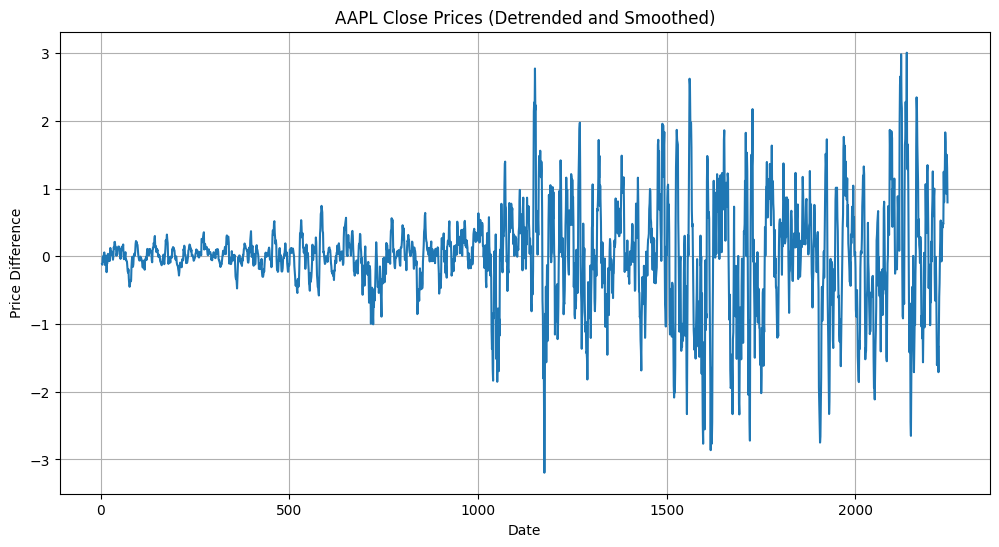

In [302]:
# prompt: plot df_appleclose_no_cycles

import matplotlib.pyplot as plt

# Assuming df_appleclose_no_cycles is already defined as in your provided code

plt.figure(figsize=(12, 6))
plt.plot(df_appleclose_no_cycles.index, df_appleclose_no_cycles.values)
plt.title('AAPL Close Prices (Detrended and Smoothed)')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.grid(True)
plt.show()

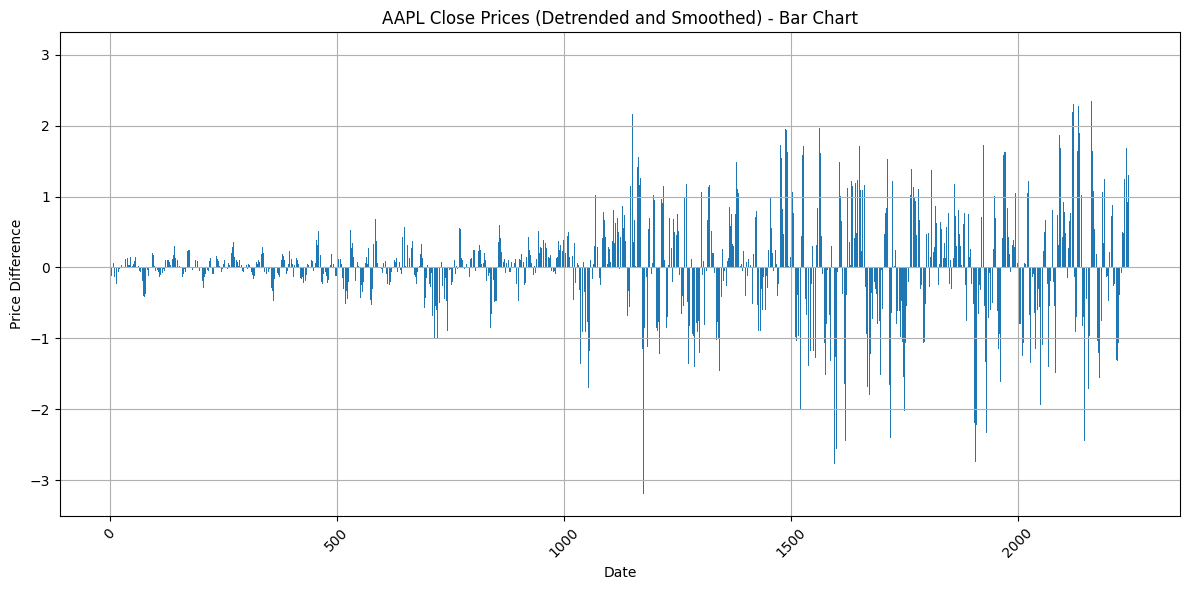

In [303]:
# prompt: plot df_appleclose_no_cycles using bar style

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(df_appleclose_no_cycles.index, df_appleclose_no_cycles.values)
plt.title('AAPL Close Prices (Detrended and Smoothed) - Bar Chart')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.grid(True)
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

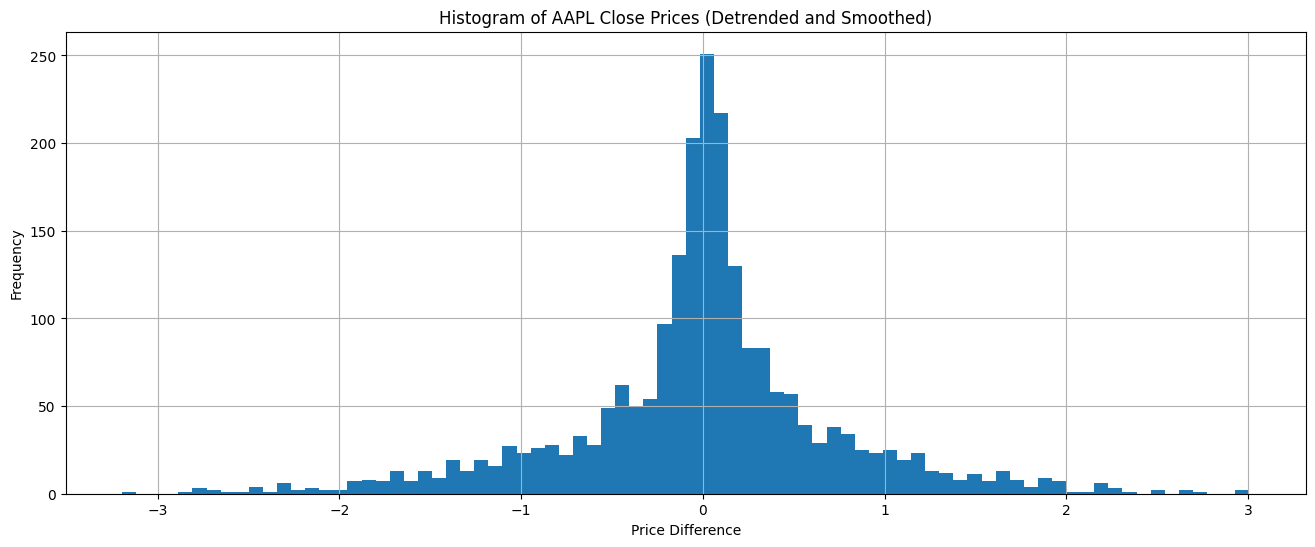

In [304]:
# prompt: plot histogram of df_appleclose_nocycle with size of 16,6 and bin number 50
# the price difference curve really follow a Gaussian distribution curve!
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
plt.hist(df_appleclose_no_cycles, bins=80)
plt.title('Histogram of AAPL Close Prices (Detrended and Smoothed)')
plt.xlabel('Price Difference')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

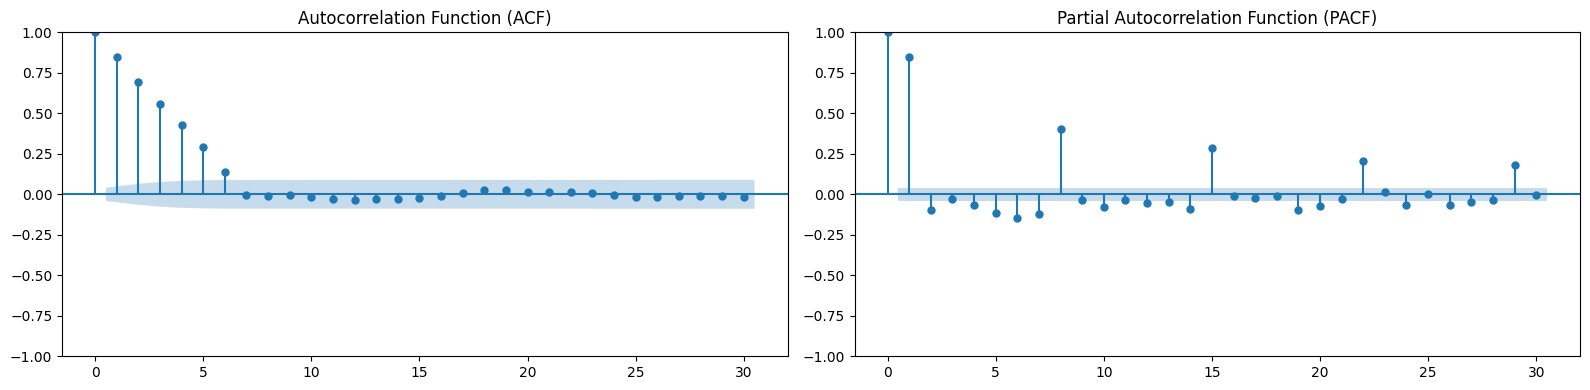

In [305]:
# prompt: generate acf and pacf plots

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming df_appleclose_no_cycles is already defined as in your provided code

fig, axes = plt.subplots(1, 2, figsize=(16, 4))

plot_acf(df_appleclose_no_cycles, lags=30, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

plot_pacf(df_appleclose_no_cycles, lags=30, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.



                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2243
Model:                 ARIMA(5, 0, 1)   Log Likelihood               -1013.321
Date:                Thu, 12 Dec 2024   AIC                           2042.641
Time:                        05:41:24   BIC                           2088.366
Sample:                             0   HQIC                          2059.333
                               - 2243                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.043      0.008      0.993      -0.084       0.085
ar.L1          0.1558      0.041      3.769      0.000       0.075       0.237
ar.L2          0.6367      0.039     16.531      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



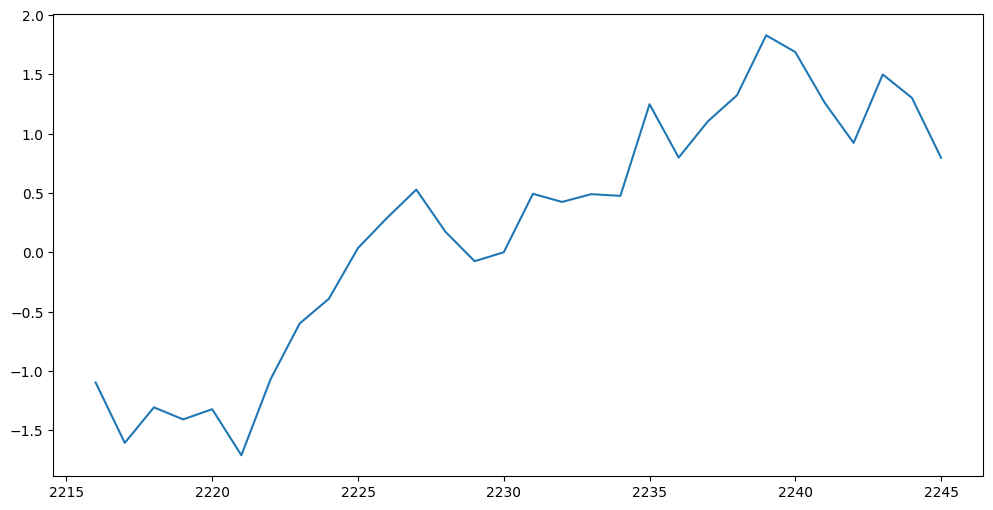

In [306]:
# prompt: generate a model of ARIMA modeling

import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Assuming df_appleclose_no_cycles is already defined from the previous code

# Fit ARIMA model (example with (p, d, q) = (5, 0, 1)) - you'll need to find the optimal order
# Experiment with different values for (p,d,q) from your ACF and PACF plots
try:
  model = ARIMA(df_appleclose_no_cycles, order=(5, 0, 1))
  model_fit = model.fit()
  print(model_fit.summary())

  # Make predictions
  predictions = model_fit.predict(start=len(df_appleclose_no_cycles) - 30, end=len(df_appleclose_no_cycles))

  # Plot actual vs predicted values
  plt.figure(figsize=(12, 6))
  plt.plot(df_appleclose_no_cycles.index[-30:], df_appleclose_no_cycles.values[-30:], label='Actual')
  plt.plot(df_appleclose_no_cycles.index[-30:], predictions, label='Predicted')
  plt.title('ARIMA Predictions')
  plt.legend()
  plt.show()
except Exception as e:
  print(f"An error occurred during ARIMA modeling: {e}")

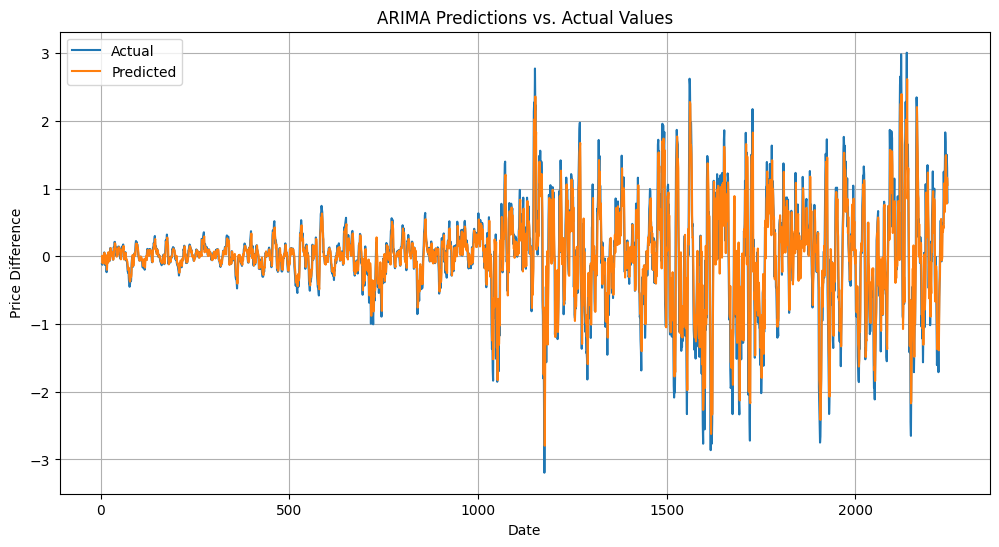

In [307]:
# prompt: compare the arima model with actual close column

# Assuming df_appleclose_no_cycles and the ARIMA model (model_fit) are already defined from the previous code

try:
  # Make predictions covering the entire test data
  predictions = model_fit.predict(start=0, end=len(df_appleclose_no_cycles)-1)

  # Create a DataFrame for easier plotting and comparison
  comparison_df = pd.DataFrame({
      'Actual': df_appleclose_no_cycles,
      'Predicted': predictions
  })

  # Plot actual vs predicted values
  plt.figure(figsize=(12, 6))
  plt.plot(comparison_df.index, comparison_df['Actual'], label='Actual')
  plt.plot(comparison_df.index, comparison_df['Predicted'], label='Predicted')
  plt.title('ARIMA Predictions vs. Actual Values')
  plt.xlabel('Date')
  plt.ylabel('Price Difference')
  plt.legend()
  plt.grid(True)
  plt.show()

except Exception as e:
  print(f"An error occurred during plotting or prediction: {e}")

In [308]:
# prompt: save the arima model named "model" into models folder

import os
import pickle

# Assuming 'model' is your trained ARIMA model

# Create the 'models' directory if it doesn't exist
os.makedirs('models', exist_ok=True)

# Save the model to a file in the 'models' directory
with open('models/arima_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [309]:
# prompt: split the dataset into test and validation sets and show the prediction

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming explanatory and target are already defined from your previous code
X_train, X_test, y_train, y_test = train_test_split(explanatory, target, test_size=0.2, random_state=42)

# Train a new model with the training data
model_dt = DecisionTreeClassifier(max_depth=7) # You can adjust hyperparameters
model_dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model_dt.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# Now you have predictions in y_pred, and the corresponding actual values in y_test
print("Predictions:", y_pred)
print("Actual values:", y_test.values) # Convert y_test to a numpy array

Test Accuracy: 0.5466666666666666
Predictions: ['UP' 'UP' 'UP' 'UP' 'DOWN' 'DOWN' 'UP' 'DOWN' 'DOWN' 'DOWN' 'UP' 'DOWN'
 'DOWN' 'UP' 'DOWN' 'DOWN' 'UP' 'UP' 'UP' 'DOWN' 'UP' 'UP' 'DOWN' 'DOWN'
 'UP' 'UP' 'DOWN' 'UP' 'DOWN' 'UP' 'DOWN' 'UP' 'DOWN' 'UP' 'UP' 'DOWN'
 'UP' 'DOWN' 'UP' 'DOWN' 'UP' 'UP' 'DOWN' 'UP' 'DOWN' 'UP' 'DOWN' 'DOWN'
 'UP' 'DOWN' 'DOWN' 'DOWN' 'DOWN' 'UP' 'DOWN' 'DOWN' 'UP' 'UP' 'UP' 'UP'
 'UP' 'UP' 'DOWN' 'UP' 'UP' 'DOWN' 'DOWN' 'UP' 'UP' 'UP' 'DOWN' 'DOWN'
 'DOWN' 'UP' 'DOWN' 'UP' 'DOWN' 'DOWN' 'UP' 'DOWN' 'DOWN' 'DOWN' 'DOWN'
 'DOWN' 'DOWN' 'DOWN' 'DOWN' 'DOWN' 'UP' 'DOWN' 'UP' 'DOWN' 'DOWN' 'DOWN'
 'DOWN' 'UP' 'UP' 'DOWN' 'DOWN' 'DOWN' 'UP' 'DOWN' 'DOWN' 'UP' 'UP' 'UP'
 'UP' 'UP' 'DOWN' 'DOWN' 'UP' 'UP' 'UP' 'DOWN' 'UP' 'UP' 'UP' 'DOWN'
 'DOWN' 'UP' 'UP' 'DOWN' 'DOWN' 'UP' 'DOWN' 'DOWN' 'DOWN' 'DOWN' 'DOWN'
 'DOWN' 'UP' 'DOWN' 'DOWN' 'DOWN' 'DOWN' 'UP' 'DOWN' 'DOWN' 'UP' 'DOWN'
 'UP' 'DOWN' 'DOWN' 'UP' 'UP' 'UP' 'DOWN' 'DOWN' 'UP' 'DOWN' 'UP' 'UP'
 'UP' 'UP' 'UP' 

In [310]:
# prompt: show info of the dataset df_AAPL_2016

df_AAPL_2016.sample(6)

Open        High         Low       Close  \
Date                                                                        
2024-01-08 00:00:00-05:00  181.202281  184.695178  180.615161  184.655365   
2017-06-28 00:00:00-04:00   33.737186   34.115441   33.426642   34.050064   
2020-04-20 00:00:00-04:00   67.526794   68.432977   67.259552   67.278984   
2022-07-20 00:00:00-04:00  149.092607  151.657732  148.352669  150.986847   
2017-04-28 00:00:00-04:00   33.505490   33.554323   33.314816   33.403175   
2023-09-20 00:00:00-04:00  178.151367  178.588649  174.315239  174.404694   

                              Volume  Dividends  Stock Splits  \
Date                                                            
2024-01-08 00:00:00-05:00   59144500        0.0           0.0   
2017-06-28 00:00:00-04:00   88329600        0.0           0.0   
2020-04-20 00:00:00-04:00  130015200        0.0           0.0   
2022-07-20 00:00:00-04:00   64823400        0.0           0.0   
2017-04-28 00:00:00-04:00   83441600        0.0           0.0   
2023-09-20 00:00:00-04:00   58436200        0.0           0.0   

                           change_tomorrow change_tomorrow_direction  \
Date                                                                   
2024-01-08 00:00:00-05:00         2.417492                        UP   
2017-06-28 00:00:00-04:00         1.461112                        UP   
2020-04-20 00:00:00-04:00        -2.075686                      DOWN   
2022-07-20 00:00:00-04:00         1.350985                        UP   
2017-04-28 00:00:00-04:00        -0.097342                      DOWN   
2023-09-20 00:00:00-04:00        -1.999211                      DOWN   

                          prediction  
Date                                  
2024-01-08 00:00:00-05:00         UP  
2017-06-28 00:00:00-04:00         UP  
2020-04-20 00:00:00-04:00         UP  
2022-07-20 00:00:00-04:00         UP  
2017-04-28 00:00:00-04:00         UP  
2023-09-20 00:00:00-04:00         UP

It is said random walk can get 94%, where best ARIMA model can get 110%.
https://youtu.be/Vyr5dthe-2s?si=Tws23Af_Iv0aw02I
https://youtu.be/Vyr5dthe-2s?si=--qW9ft5vyyuBpHt

# **Auxiliary： Other data source**

Kaggle source page https://www.kaggle.com/datasets/leukipp/hourly-stock-prices
Free data of last year https://firstratedata.com/free-intraday-data


## **Auxiliary: Demonstration of support and resistance level**
https://youtu.be/qZElw2uN1NI?si=OkpnoWN_dl2Vl0k1

In [311]:
df_AAPL_2020_2022.sample(10)

Open        High         Low       Close  \
Date                                                                        
2022-01-26 00:00:00-05:00  160.864895  161.740550  155.276446  157.116302   
2020-12-07 00:00:00-05:00  119.601446  121.811400  119.542777  121.009560   
2020-01-27 00:00:00-05:00   75.149437   75.563889   73.893959   74.880409   
2021-12-08 00:00:00-05:00  169.355803  173.124077  167.948842  172.258255   
2022-02-10 00:00:00-05:00  171.551733  172.871813  169.000232  169.561752   
2022-10-28 00:00:00-04:00  146.414873  155.602854  146.039461  153.864059   
2021-02-10 00:00:00-05:00  133.657066  134.156527  131.620086  132.589615   
2020-05-13 00:00:00-04:00   76.040826   76.966524   73.863011   74.944611   
2022-08-15 00:00:00-04:00  169.453954  171.301424  169.286003  171.103836   
2021-07-02 00:00:00-04:00  135.277082  137.337145  135.129941  137.297913   

                              Volume  Dividends  Stock Splits  
Date                                                           
2022-01-26 00:00:00-05:00  108275300        0.0           0.0  
2020-12-07 00:00:00-05:00   86712000        0.0           0.0  
2020-01-27 00:00:00-05:00  161940000        0.0           0.0  
2021-12-08 00:00:00-05:00  116998900        0.0           0.0  
2022-02-10 00:00:00-05:00   90865900        0.0           0.0  
2022-10-28 00:00:00-04:00  164762400        0.0           0.0  
2021-02-10 00:00:00-05:00   73046600        0.0           0.0  
2020-05-13 00:00:00-04:00  200622400        0.0           0.0  
2022-08-15 00:00:00-04:00   54091700        0.0           0.0  
2021-07-02 00:00:00-04:00   78852600        0.0           0.0

In [312]:
df_AAPL_2020_2022.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2020-01-02 00:00:00-05:00 to 2022-12-30 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          756 non-null    float64
 1   High          756 non-null    float64
 2   Low           756 non-null    float64
 3   Close         756 non-null    float64
 4   Volume        756 non-null    int64  
 5   Dividends     756 non-null    float64
 6   Stock Splits  756 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 47.2 KB


In [314]:
df=df_AAPL_2020_2022
def isSupport(df,i):
    support = df['Low'][i] < df['Low'][i-1] and df['Low'][i] < df['Low'][i+1] and df['Low'][i+1] < df['Low'][i+2] and df['low'][i-1]<df['Low'][i-2]
    return support

def isResistance(df,i):
    resistance = df['High'][i] > df['High'][i-1] and df['High'][i] > df['High'][i+1] and df['High'][i+1] > df['High'][i+2] and df['High'][i-1]>df['High'][i-2]
    return resistance

levles = []
for i in range(2,df.shape[0]-2):
  if isSupport(df,i):
    levels.append(i,df['Low'][i])
  elif isResistance(df,i):
    levels.append(i,df['High'][i])

def plot_all():
  fig, ax = plt.subplots(figsize=(15,10))

fig = go.Figure(data=[go.Candlestick(x=df_AAPL.index,
                open=df_AAPL['Open'],
                high=df_AAPL['High'],
                low=df_AAPL['Low'],
                close=df_AAPL['Close'])])

fig.update_layout(title='AAPL Candlestick Chart',
                  yaxis_title='Price')

fig.show()

TypeError: 'int' object is not callable

# **Part 7: Cross-validation multi stock emsemble prediction**

Information makes stock market wins.  Information can be
1. From down stream to up stream
2. Cross-comparison of industry
3. Related companies moves
4. Sentiments and resistance

# **Part 8: Chaos theory exploration**

https://youtu.be/GMhVuZa6VtY?si=pLxtPM-SP9giJEcH